# **Intrusion Classification System**

In [ ]:
# @title
# install ucimlrepo to access dataset
!pip install ucimlrepo

# load needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# metadata
print(rt_iot2022.metadata)

# variable information
print(rt_iot2022.variables)

# take a peak at the x variables
X.head()

{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,2282414.913,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,2028306.961,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,2281903.982,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,2047288.179,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,2087656.975,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502


In [ ]:
X.shape

(123117, 83)

In [ ]:
X.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,7.035683e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,7.415634e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,1.490871e+02,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,4.934475e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,1.048576e+06,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,65535.000000,65389.000000,21728.335580,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,2.097152e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


In [ ]:
y.head()

,Attack_type
0,MQTT_Publish
1,MQTT_Publish
2,MQTT_Publish
3,MQTT_Publish
4,MQTT_Publish


In [ ]:
X.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [ ]:
y.columns

Index(['Attack_type'], dtype='object')

In [ ]:
y['Attack_type'].value_counts()

,count
Attack_type,
DOS_SYN_Hping,94659
Thing_Speak,8108
ARP_poisioning,7750
MQTT_Publish,4146
NMAP_UDP_SCAN,2590
NMAP_XMAS_TREE_SCAN,2010
NMAP_OS_DETECTION,2000
NMAP_TCP_scan,1002
DDOS_Slowloris,534


In [ ]:
y.describe()

,Attack_type
count,123117
unique,12
top,DOS_SYN_Hping
freq,94659


In [ ]:
# Initial Data Construction

# Combining X and y initially makes cleaning (dropping rows) easier
df = rt_iot2022.data.features.copy()
df['target'] = rt_iot2022.data.targets

print(f"Initial Shape: {df.shape}")

Initial Shape: (123117, 84)


In [ ]:
print(df.dtypes)

id.orig_p                 int64
id.resp_p                 int64
proto                    object
service                  object
flow_duration           float64
                         ...   
idle.std                float64
fwd_init_window_size      int64
bwd_init_window_size      int64
fwd_last_window_size      int64
target                   object
Length: 84, dtype: object


In [ ]:
df.dtypes.reset_index().rename(columns={'index': 'Column Name', 0: 'Data Type'}).to_csv('my_dtypes.csv', index=False)

In [ ]:
# save the dataframe
df.to_csv("raw_dataset.csv", index=False)

## **Phase 1: EDA & Data Cleaning**

In [ ]:
# 1. Check for Missing Values
missing_counts = df.isnull().sum()

if missing_counts.sum() > 0:
    print(f"Missing values detected ({missing_counts.sum()} total). Imputing...")

# Added this for completeness
    # Step A: Drop rows where the Target itself is missing
    # We cannot use conditional imputation if we don't know the condition (the label).
    df = df.dropna(subset=['target'])

    # Step B: Conditional Median Imputation for Numeric Features
    # Identify numeric columns that still have missing values
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    cols_with_missing = [col for col in numeric_cols if df[col].isnull().any()]

    for col in cols_with_missing:
        # 1. Calculate median for this column, grouped by 'target'
        # 2. Use 'transform' to broadcast that median back to the original row index
        # 3. Fill only the NaNs in that column
        df[col] = df[col].fillna(df.groupby('target')[col].transform('median'))

        # Fallback: If a specific class has ALL NaNs for a feature, the group median will also be NaN.
        # We fill any remaining NaNs with the global median to be safe.
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].median())

    print("Imputation complete using Target-Conditional Medians.")

else:
    print("No missing values detected.")

No missing values detected.


In [ ]:
# 2. Check for Zero Variance (Constant columns)
# We utilize VarianceThreshold to find features that have the same value in all samples.
selector = VarianceThreshold(threshold=0)
selector.fit(df.drop('target', axis=1).select_dtypes(include=[np.number]))
constant_features = [col for col in df.drop('target', axis=1).select_dtypes(include=[np.number]).columns
                     if col not in df.drop('target', axis=1).select_dtypes(include=[np.number]).columns[selector.get_support()]]

if constant_features:
    print(f"Dropping constant features: {constant_features}")
    df = df.drop(columns=constant_features)

Dropping constant features: ['bwd_URG_flag_count']


In [ ]:
# 3. Data Type Separation
# Identifying categorical features (e.g., proto, service)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('target') # Ensure target isn't treated as a feature yet
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical Features: {categorical_cols}")
print(f"Numeric Features: {len(numeric_cols)}")

Categorical Features: ['proto', 'service']
Numeric Features: 80


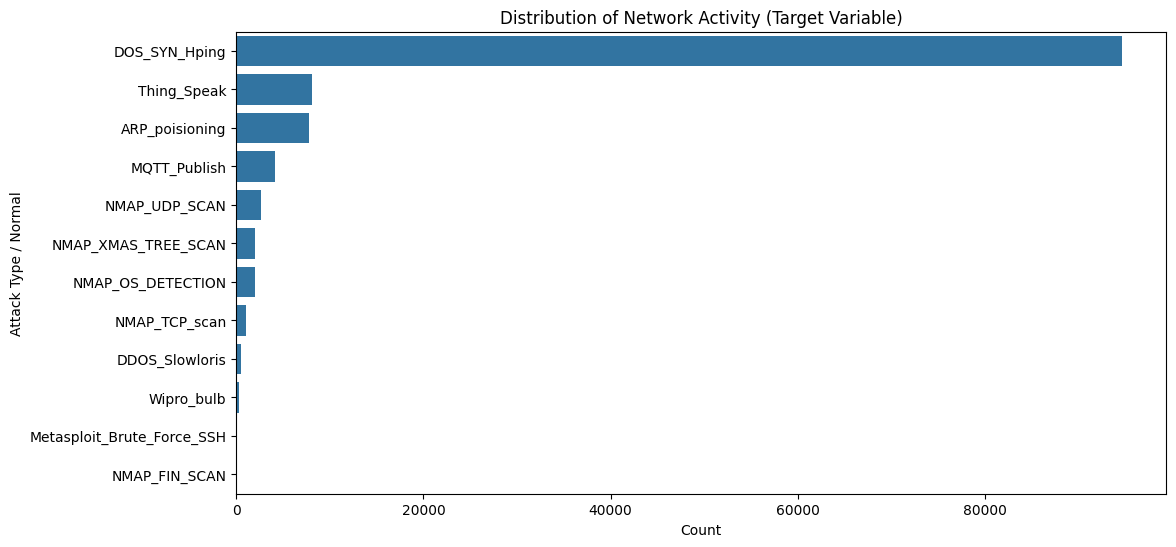

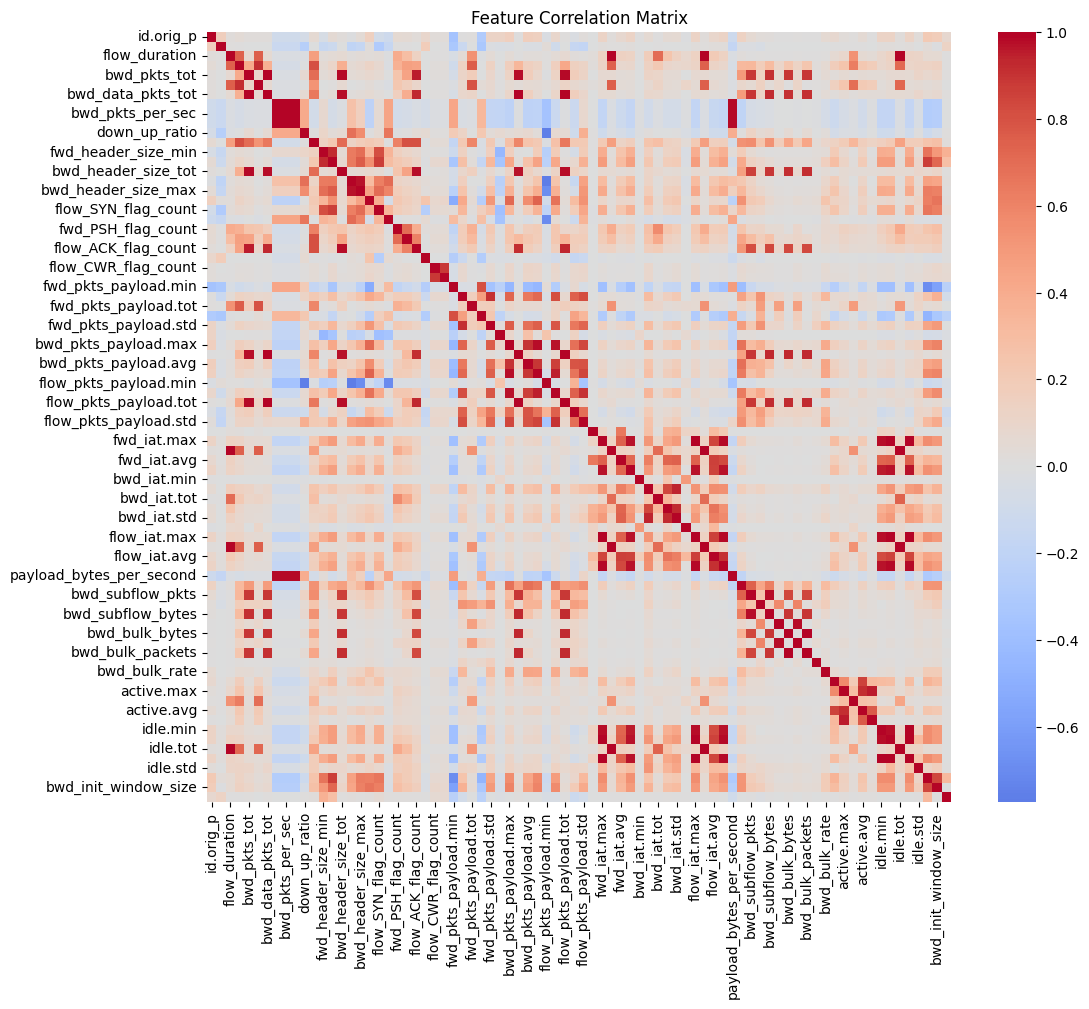

In [ ]:
# 4. Visualization

# A. Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='target', data=df, order = df['target'].value_counts().index)
plt.title('Distribution of Network Activity (Target Variable)')
plt.xlabel('Count')
plt.ylabel('Attack Type / Normal')
plt.show()

# B. Correlation Matrix (Numerical Features only)
# Plotting only a subset or aggregate to avoid a messy 80x80 heatmap
plt.figure(figsize=(12, 10))
# Select a sample of columns if the matrix is too dense
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Note that we can see there are some variables that are highly correlated, so feature selection is crucial and will provide better results.


[Flow Timing] Candidates to Drop (>0.95 Correlation): ['bwd_data_pkts_tot', 'bwd_pkts_per_sec', 'flow_pkts_per_sec']


/tmp/ipython-input-3405893861.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


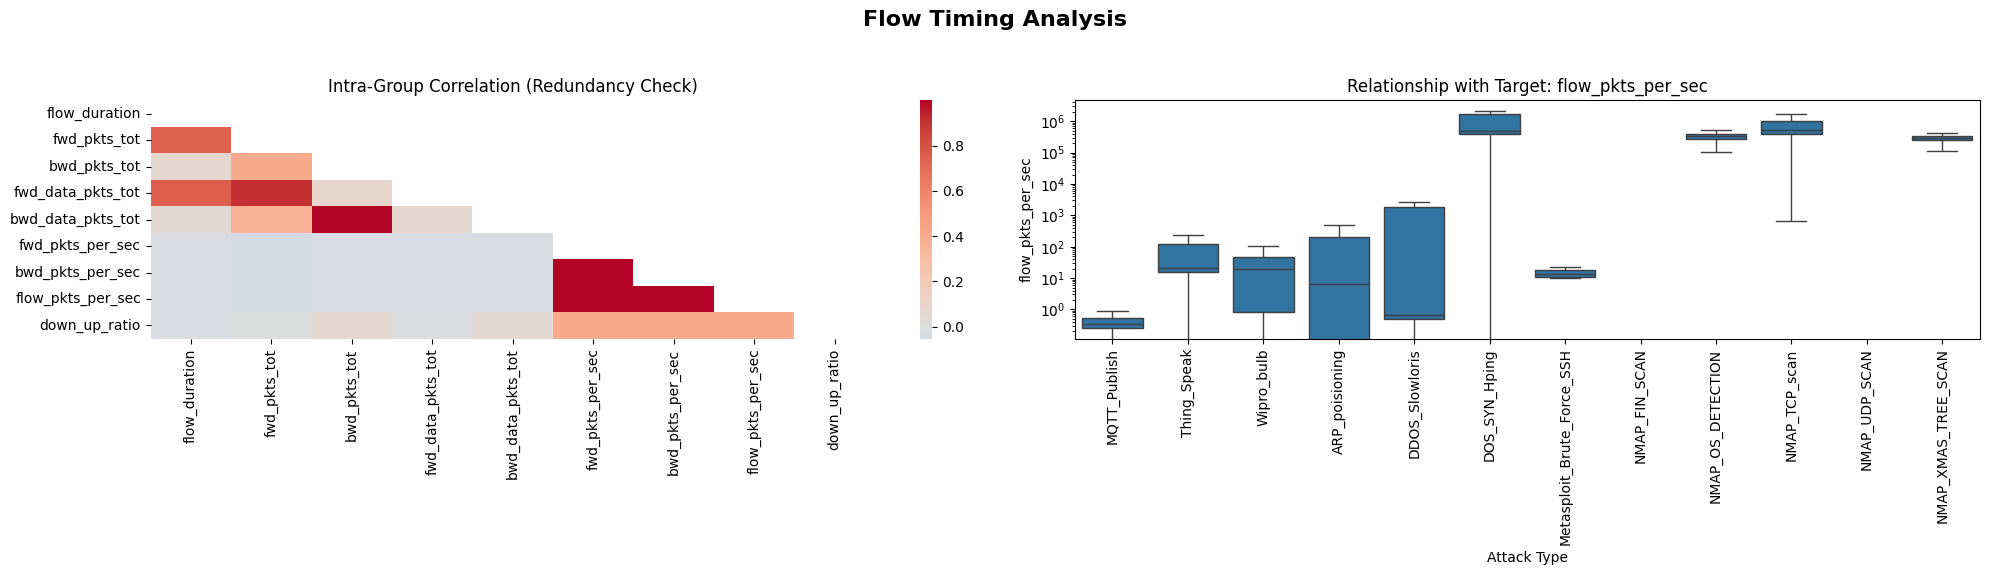


[Header Stats] Candidates to Drop (>0.95 Correlation): ['bwd_header_size_max']


/tmp/ipython-input-3405893861.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


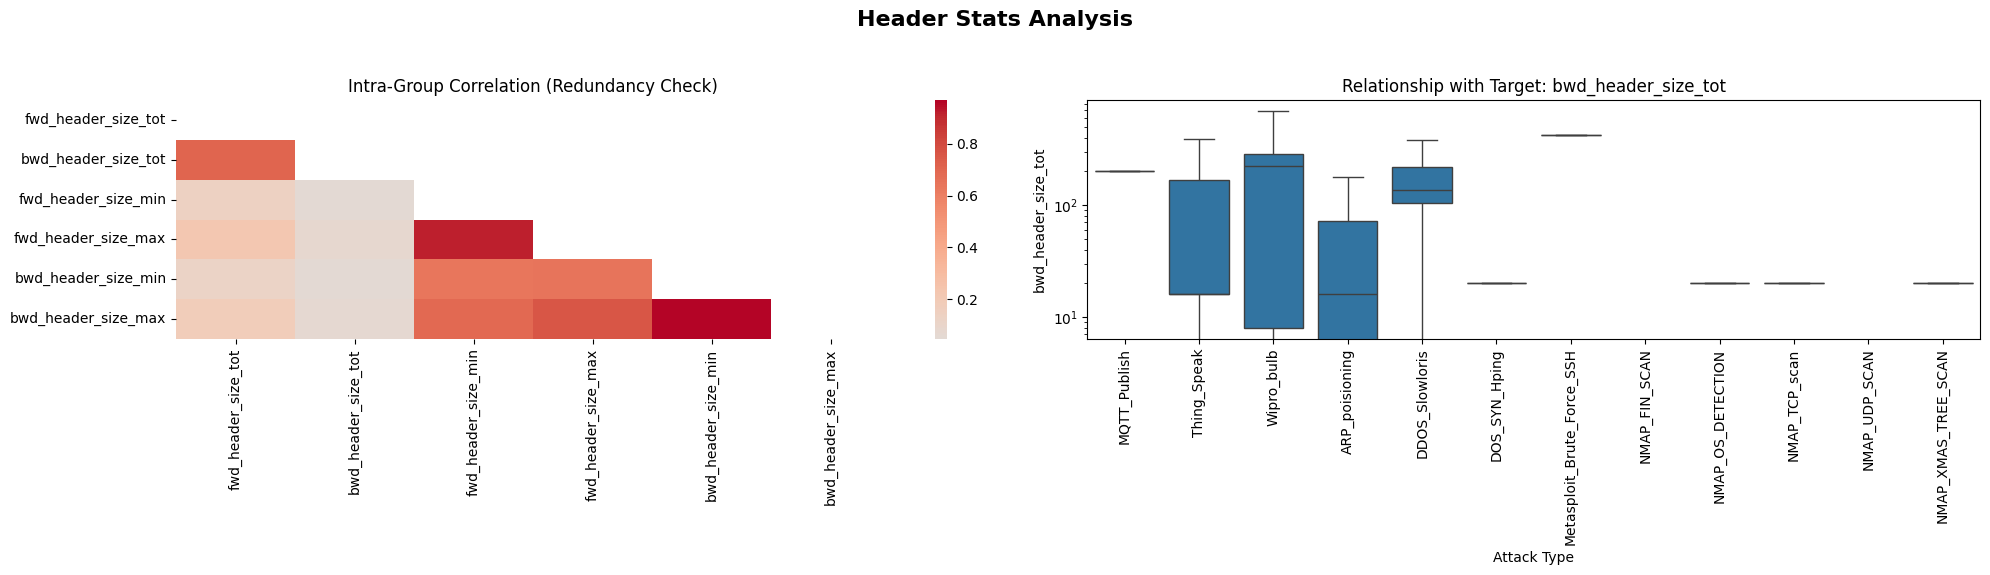

/tmp/ipython-input-3405893861.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


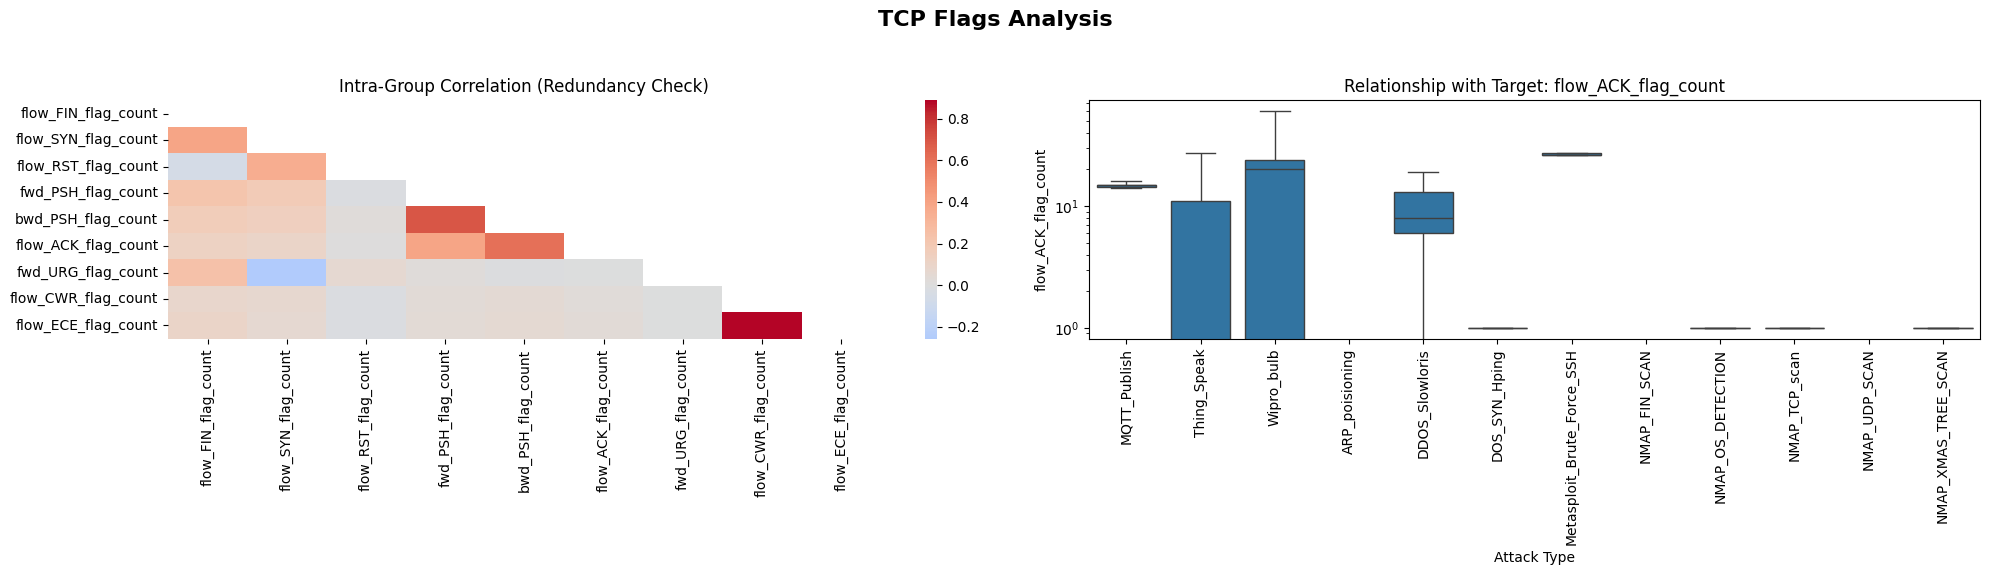


[Payload Stats] Candidates to Drop (>0.95 Correlation): ['bwd_pkts_payload.std', 'flow_pkts_payload.max', 'flow_pkts_payload.tot']


/tmp/ipython-input-3405893861.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


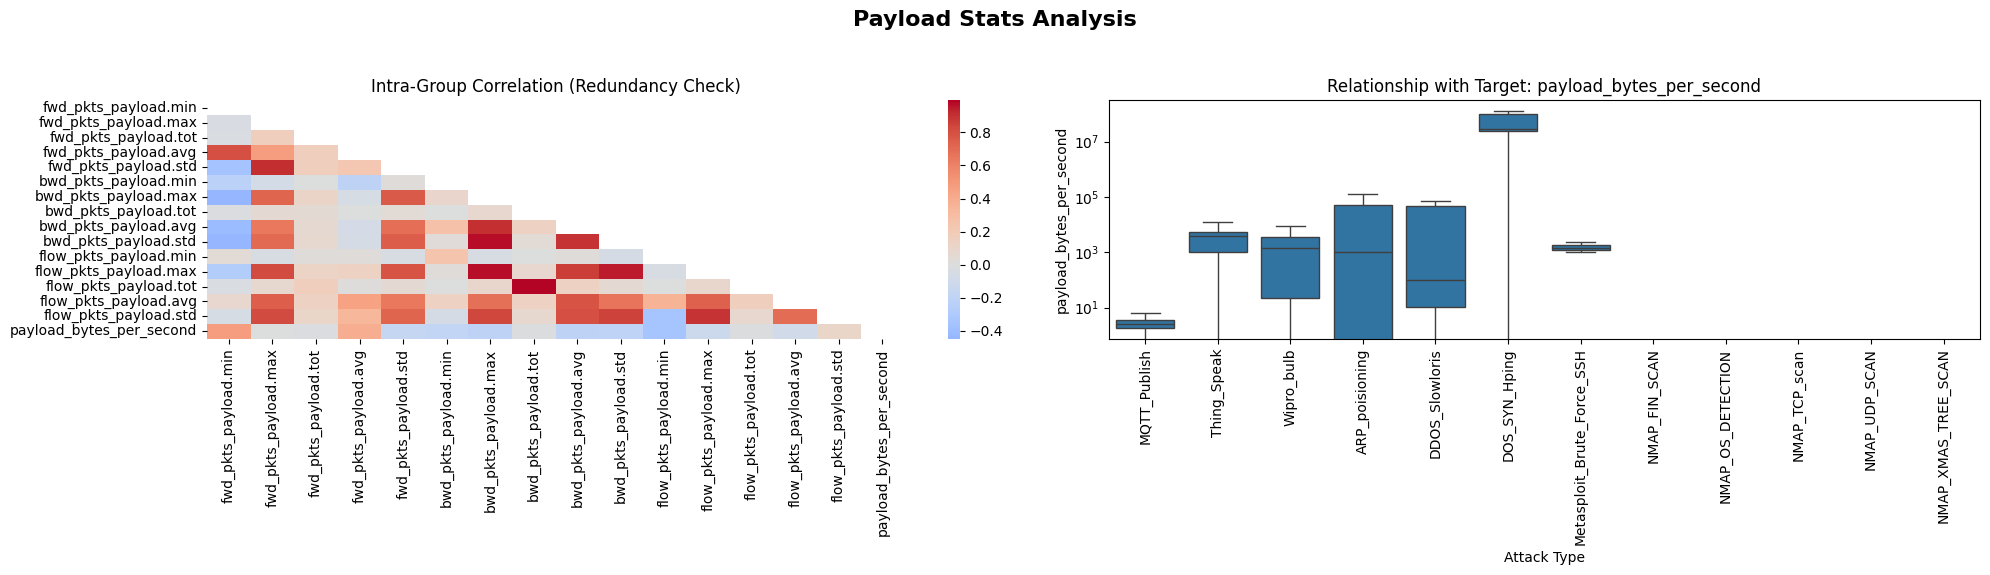


[IAT Stats (Timing)] Candidates to Drop (>0.95 Correlation): ['fwd_iat.std', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.std']


/tmp/ipython-input-3405893861.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


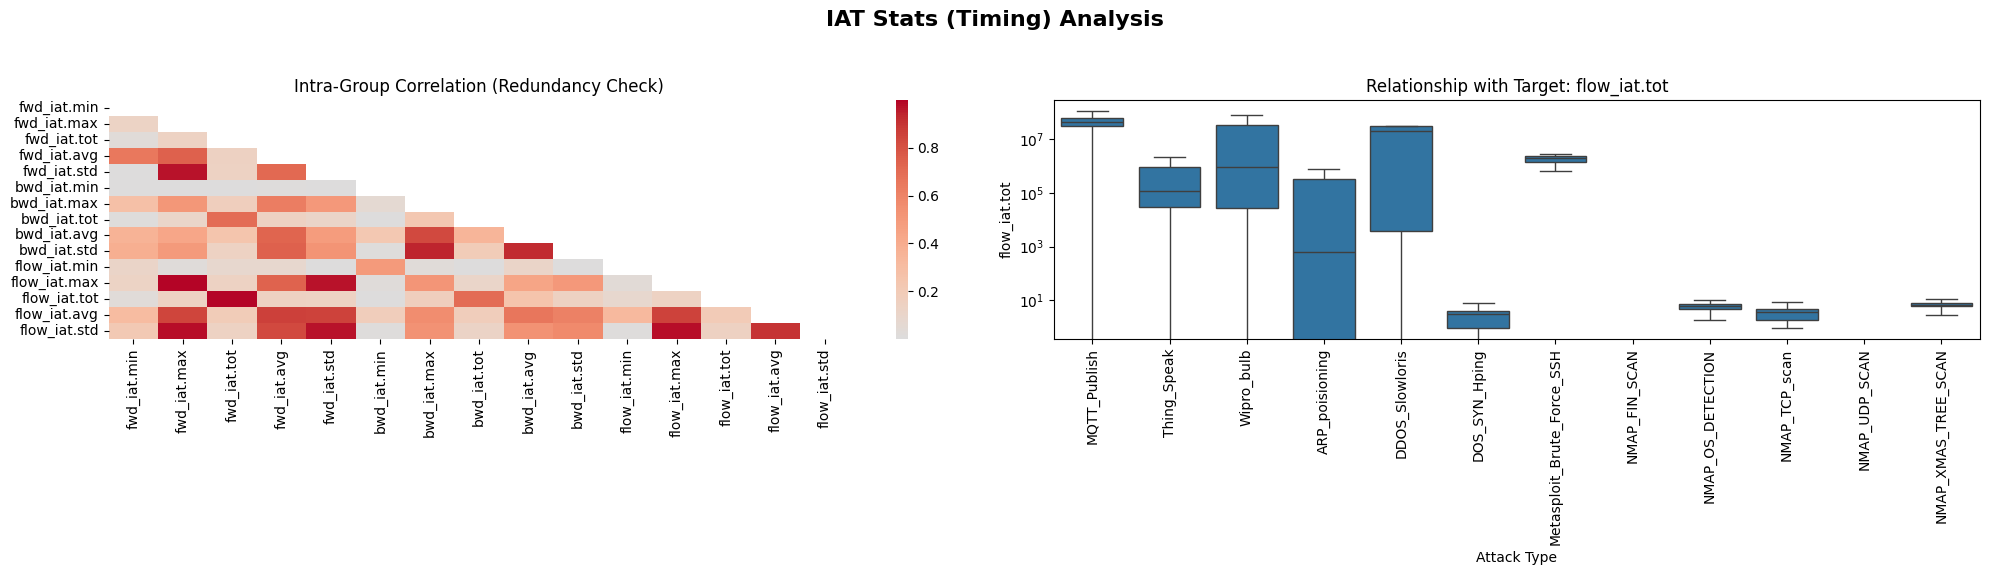


[Subflow & Bulk] Candidates to Drop (>0.95 Correlation): ['bwd_subflow_bytes']


/tmp/ipython-input-3405893861.py:83: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes[1].set_yscale('log')
/tmp/ipython-input-3405893861.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


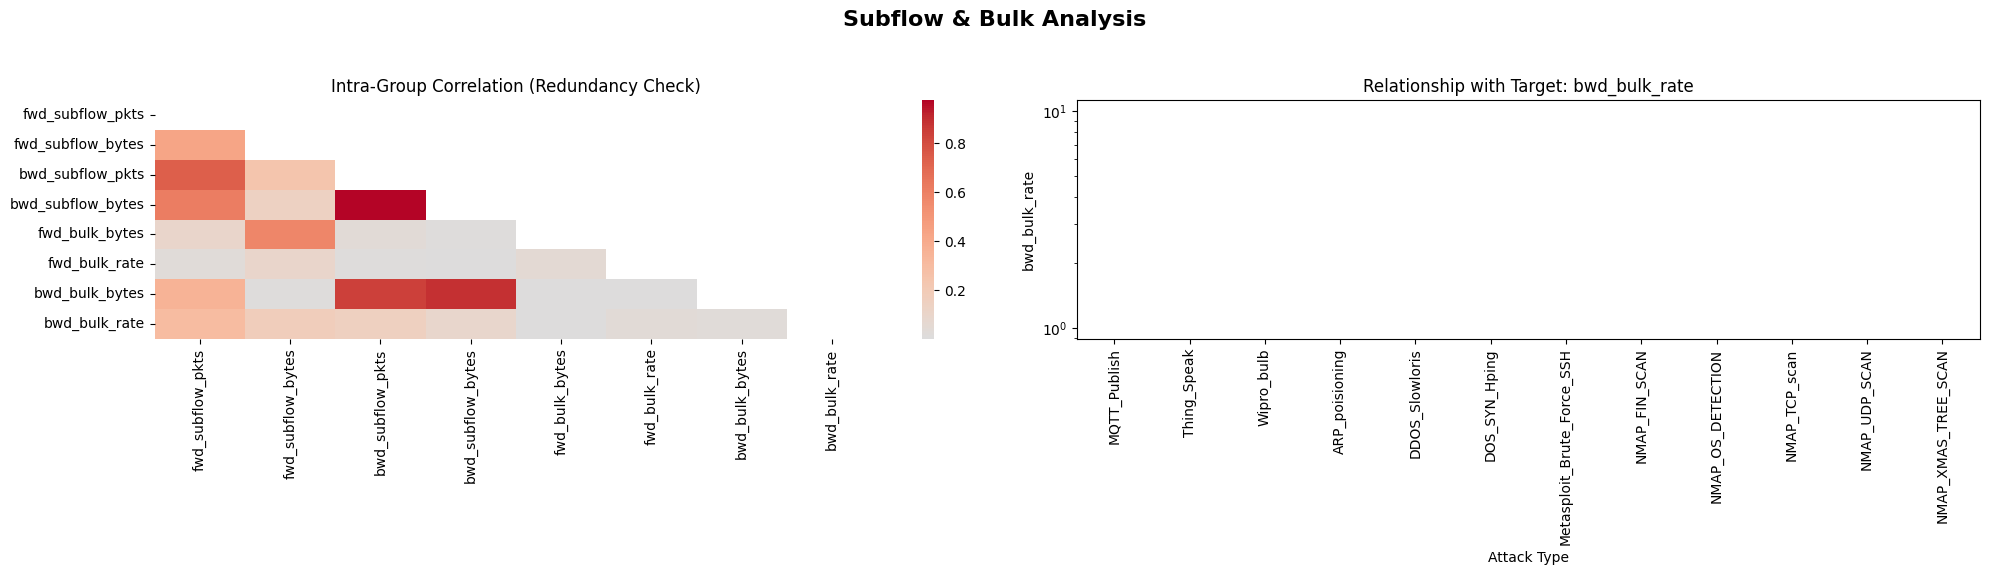


[Active/Idle] Candidates to Drop (>0.95 Correlation): ['active.std', 'idle.max', 'idle.avg']


/tmp/ipython-input-3405893861.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


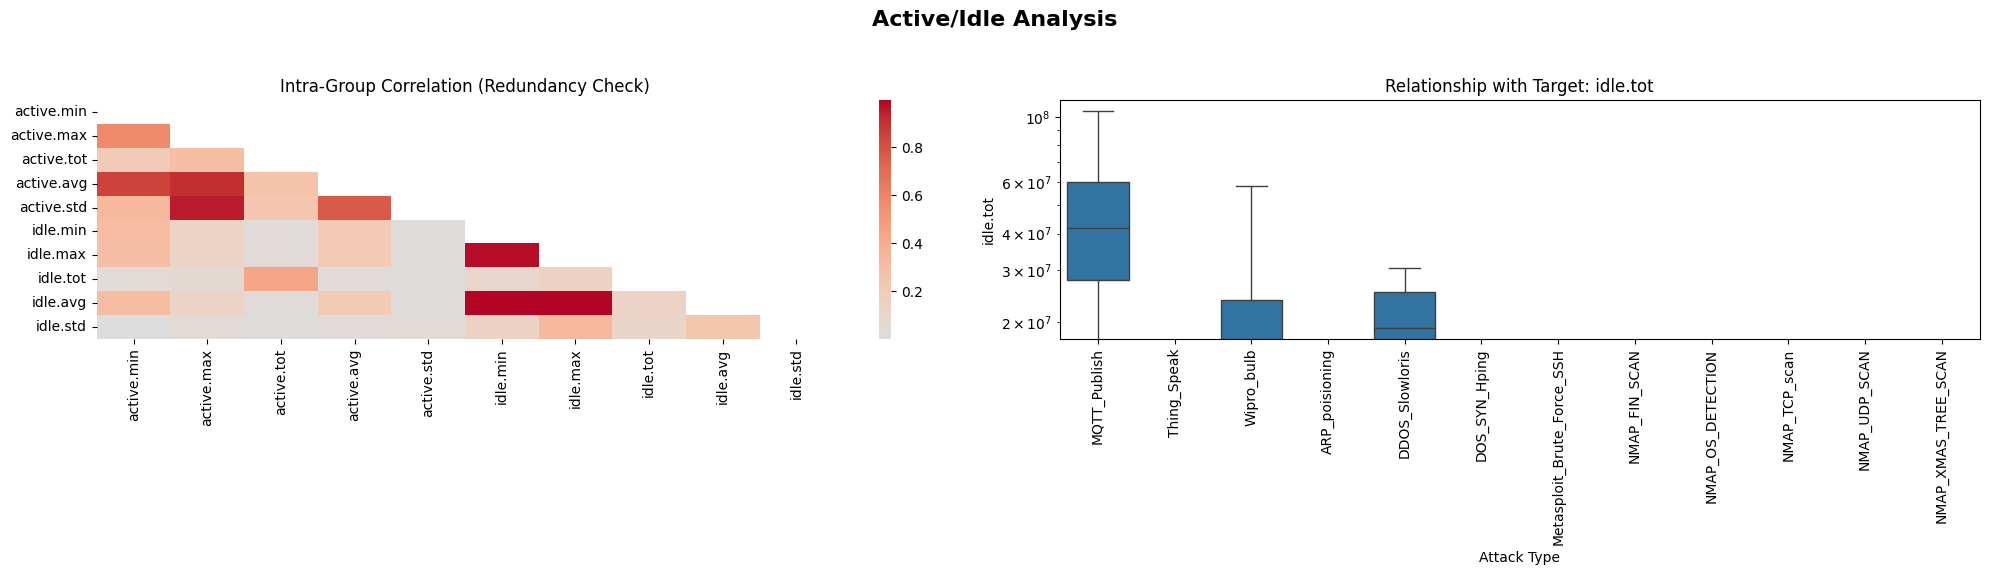

/tmp/ipython-input-3405893861.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


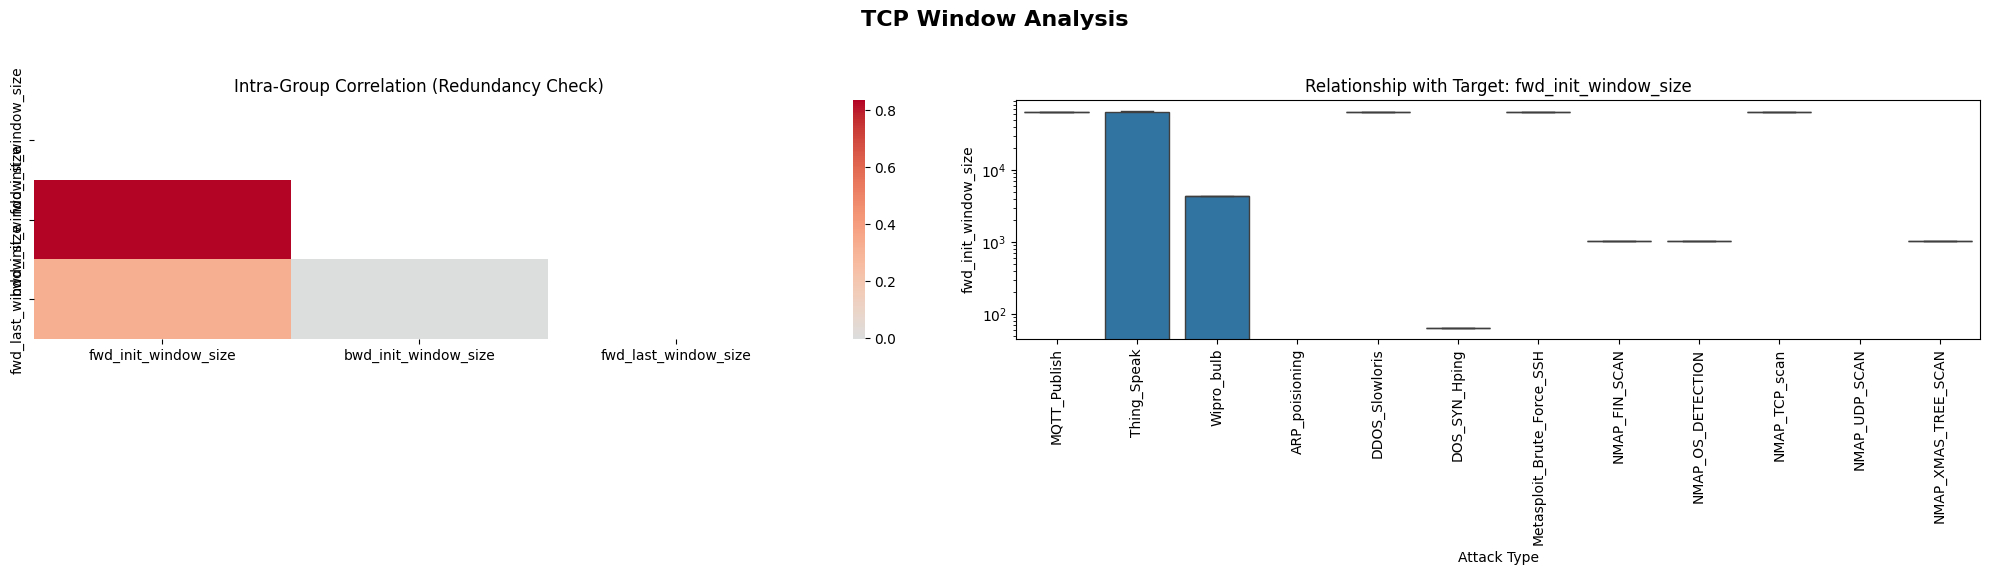

/tmp/ipython-input-3405893861.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/tmp/ipython-input-3405893861.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


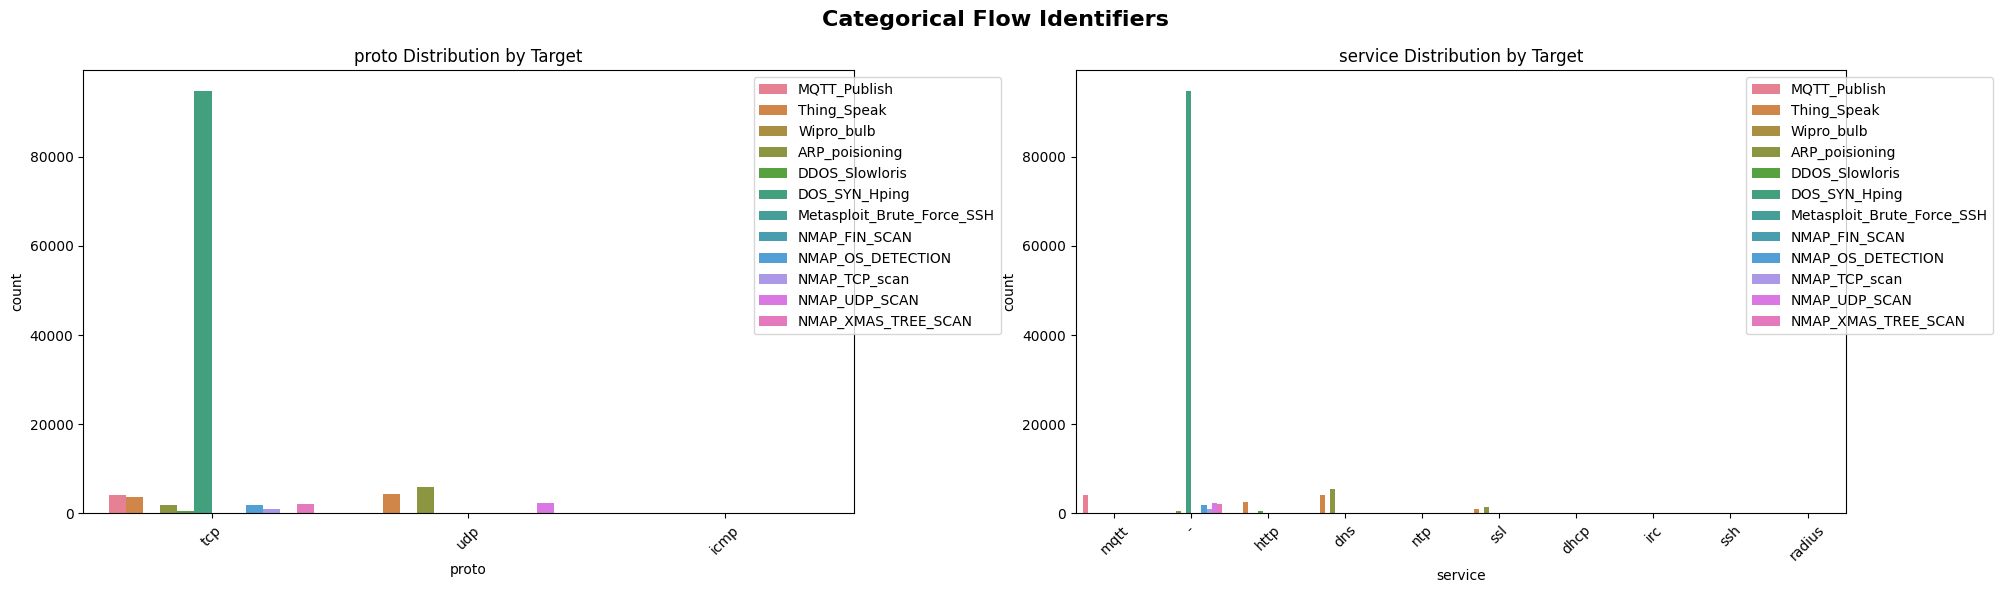

In [ ]:
# C. Correlation Matrices by Groupings
# Define your Feature Groups
groupings = {
    "Flow Timing": [
        'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
        'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
        'flow_pkts_per_sec', 'down_up_ratio'
    ],
    "Header Stats": [
        'fwd_header_size_tot', 'bwd_header_size_tot', 'fwd_header_size_min',
        'fwd_header_size_max', 'bwd_header_size_min', 'bwd_header_size_max'
    ],
    "TCP Flags": [
        'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
        'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
        'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
        'flow_ECE_flag_count'
    ],
    "Payload Stats": [
        'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
        'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
        'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
        'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max',
        'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 'flow_pkts_payload.std',
        'payload_bytes_per_second'
    ],
    "IAT Stats (Timing)": [
        'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std',
        'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot', 'bwd_iat.avg', 'bwd_iat.std',
        'flow_iat.min', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std'
    ],
    "Subflow & Bulk": [
        'fwd_subflow_pkts', 'fwd_subflow_bytes', 'bwd_subflow_pkts',
        'bwd_subflow_bytes', 'fwd_bulk_bytes', 'fwd_bulk_pkts',
        'fwd_bulk_rate', 'bwd_bulk_bytes', 'bwd_bulk_pkts', 'bwd_bulk_rate'
    ],
    "Active/Idle": [
        'active.min', 'active.max', 'active.tot', 'active.avg', 'active.std',
        'idle.min', 'idle.max', 'idle.tot', 'idle.avg', 'idle.std'
    ],
    "TCP Window": [
        'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size'
    ]
}

# Loop through groups and Plot
for group_name, features in groupings.items():
    # Filter to only include features that actually exist in the dataframe
    valid_features = [f for f in features if f in df.columns]

    if not valid_features:
        continue

    # Create Figure with 2 Subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(f'{group_name} Analysis', fontsize=16, weight='bold')

    # --- LEFT PLOT: Correlation Heatmap (For Dropping Variables) ---
    # Calculate correlation only for this group
    corr = df[valid_features].corr()

    # Mask the upper triangle (duplicate info)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', center=0, ax=axes[0])
    axes[0].set_title('Intra-Group Correlation (Redundancy Check)')

    # Print high correlations to console for easy decision making
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    high_corr = [col for col in upper.columns if any(upper[col] > 0.95)]
    if high_corr:
        print(f"\n[{group_name}] Candidates to Drop (>0.95 Correlation): {high_corr}")

    # --- RIGHT PLOT: Target Relationship (Boxplot) ---
    # We pick the feature with the highest standard deviation as the 'Representative'
    # for this group to visualize against the target.
    if valid_features:
        rep_feature = df[valid_features].std().idxmax()

        sns.boxplot(x='target', y=rep_feature, data=df, ax=axes[1], showfliers=False)

        # Use Log Scale because network data has massive range (0 to billions)
        axes[1].set_yscale('log')
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
        axes[1].set_title(f'Relationship with Target: {rep_feature}')
        axes[1].set_xlabel('Attack Type')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 3. Special Plot for Categorical Flow Identifiers (Proto/Service)
categorical_groups = ['proto', 'service']
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Categorical Flow Identifiers', fontsize=16, weight='bold')

for i, col in enumerate(categorical_groups):
    if col in df.columns:
        # Show the top 10 most frequent values for readability
        top_10 = df[col].value_counts().nlargest(10).index
        sns.countplot(x=col, hue='target', data=df[df[col].isin(top_10)], ax=axes[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        axes[i].set_title(f'{col} Distribution by Target')
        axes[i].legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

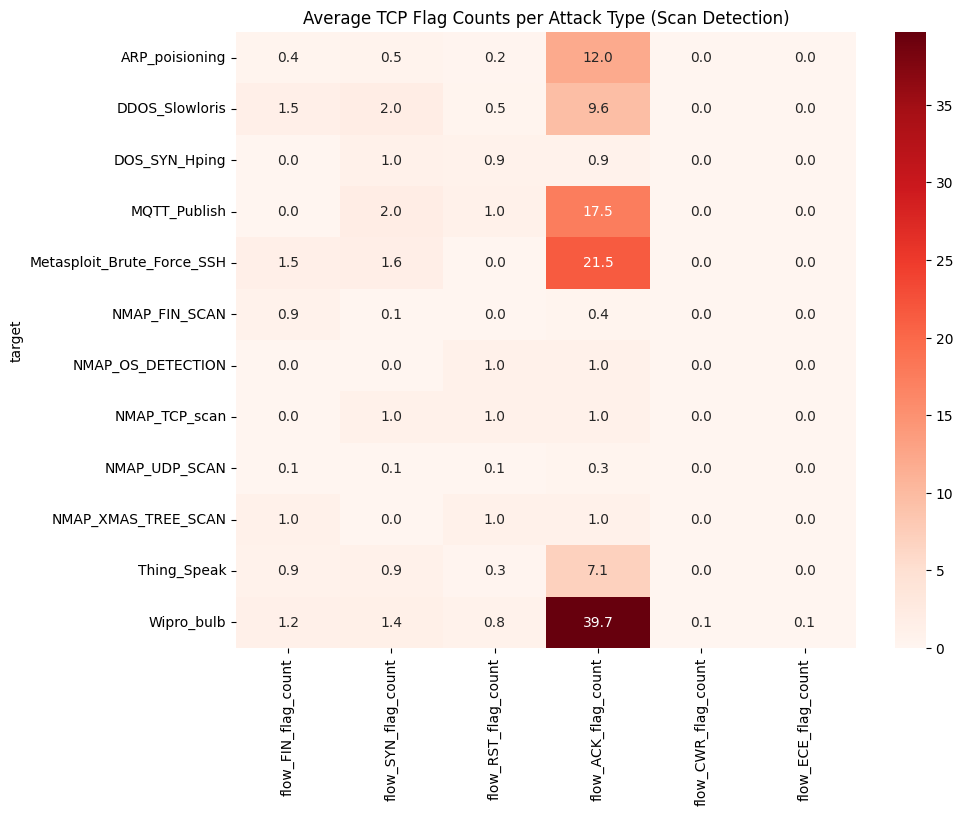

In [ ]:
# D. The "Scan" Signature: TCP Flags Heatmap
# Aggregating mean flag counts per attack type
flag_cols = ['flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'flow_ACK_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',]
flag_means = df.groupby('target')[flag_cols].mean()
plt.figure(figsize=(10, 8))
sns.heatmap(flag_means, annot=True, cmap='Reds', fmt='.1f')
plt.title('Average TCP Flag Counts per Attack Type (Scan Detection)')
plt.show()

# 'flow_ACK_flag_count' will be a important feauture to predicting the target

In [ ]:
# 5. Refined Drop List based on Intuition/Domain Knowledge

# 1. Define Intuitive Drops
intuitive_drops = [
    'id.orig_p',             # Random ephemeral port (noise/overfitting)
    'fwd_header_size_tot',   # Linear duplicate of packet counts
    'bwd_header_size_tot',
    'flow_iat.tot',          # Duplicate of flow_duration
    'fwd_iat.tot',
    'bwd_iat.tot',
    'fwd_data_pkts_tot',     # Redundant with fwd_pkts_tot in floods
    'bwd_data_pkts_tot'
]

# 2. Define Subflow/Bulk Drops (The "Illusion" features)
subflow_bulk_drops = [c for c in df.columns if 'subflow' in c or 'bulk' in c]

# 3. Combine and Execute
full_drop_list = list(set(intuitive_drops + subflow_bulk_drops))

# Filter for columns that actually exist in your dataframe
existing_drops = [c for c in full_drop_list if c in df.columns]

print(f"Dropping {len(existing_drops)} intuitively redundant features...")
df = df.drop(columns=existing_drops)

# NOW run your correlation matrix code from earlier to catch any remaining mathematical duplicates!

Dropping 18 intuitively redundant features...


In [ ]:
# 6. Highly Correlated Features (>0.95)

# Checking for high correlations (>0.95) on the entire dataset

# We must exclude categorical columns (strings) or .corr() will crash
numeric_df = df.drop(columns=categorical_cols + ['target'])

corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"Found {len(to_drop_corr)} features to drop due to high correlation.")

# Table Print Logic
print(f"{'\nDROPPED FEATURE':<41} | {'CORRELATED WITH (KEPT)'}")
print("-" * 80)
for column in to_drop_corr:
    # Check the 'upper' matrix for the feature that triggered the correlation
    # The row index represents the feature that was kept
    correlated_features = upper.index[upper[column] > 0.95].tolist()
    # Print the result
    print(f"{column:<40} | {correlated_features}")
print("-" * 80)

Found 17 features to drop due to high correlation.

DROPPED FEATURE                          | CORRELATED WITH (KEPT)
--------------------------------------------------------------------------------
bwd_pkts_per_sec                         | ['fwd_pkts_per_sec']
flow_pkts_per_sec                        | ['fwd_pkts_per_sec', 'bwd_pkts_per_sec']
bwd_header_size_max                      | ['bwd_header_size_min']
flow_ACK_flag_count                      | ['bwd_pkts_tot']
bwd_pkts_payload.tot                     | ['bwd_pkts_tot']
bwd_pkts_payload.std                     | ['bwd_pkts_payload.max']
flow_pkts_payload.max                    | ['bwd_pkts_payload.max']
flow_pkts_payload.tot                    | ['bwd_pkts_tot', 'bwd_pkts_payload.tot']
fwd_iat.std                              | ['fwd_iat.max']
flow_iat.max                             | ['fwd_iat.max', 'fwd_iat.std']
flow_iat.std                             | ['fwd_iat.max', 'fwd_iat.std', 'flow_iat.max']
payload_bytes_per_secon

In [ ]:
# Drop from the main dataframe
df = df.drop(columns=to_drop_corr)

In [ ]:
df['burstiness'] = df['fwd_pkts_payload.tot'] / (df['flow_duration'] + 1)
df.shape


(123117, 49)

## **Phase 2: Preprocessing**

In [ ]:

# 1. Separate X and y
X = df.drop('target', axis=1)
y = df['target']

# 2. One-Hot Encoding Categorical Features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 3. Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Scaling (StandardScaler)
scaler = StandardScaler()
cols_to_scale = [c for c in X_train.columns if c in numeric_cols]

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Data Scaled and Split.")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


Data Scaled and Split.
Training Shape: (98493, 57)
Testing Shape: (24624, 57)


## Checking Logistics Regression performance on original dataset





In [ ]:
# ---------------------------------------------------------
# 1. Train Logistic Regression (Scenario 1)
# ---------------------------------------------------------
# Initialize the model
log_reg_1 = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42,
    max_iter=5000,
    class_weight='balanced',  # <--- for imbalanced dataset
    n_jobs=-1
)
# Fit on the Scaled Training Data
log_reg_1.fit(X_train, y_train)
# Predict
y_pred = log_reg_1.predict(X_test)
y_pred_proba = log_reg_1.predict_proba(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Classification Report (Focus on 'Macro Avg' and Per-Class F1) ---
                            precision    recall  f1-score   support

            ARP_poisioning       0.97      0.88      0.92      1550
            DDOS_Slowloris       0.75      0.98      0.85       107
             DOS_SYN_Hping       1.00      1.00      1.00     18932
              MQTT_Publish       1.00      0.99      0.99       829
Metasploit_Brute_Force_SSH       0.16      1.00      0.27         7
             NMAP_FIN_SCAN       0.14      0.83      0.24         6
         NMAP_OS_DETECTION       1.00      1.00      1.00       400
             NMAP_TCP_scan       1.00      1.00      1.00       200
             NMAP_UDP_SCAN       0.99      0.94      0.96       518
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       402
               Thing_Speak       0.93      0.95      0.94      1622
                Wipro_bulb       0.48      0.92      0.63        51

                  accuracy                  

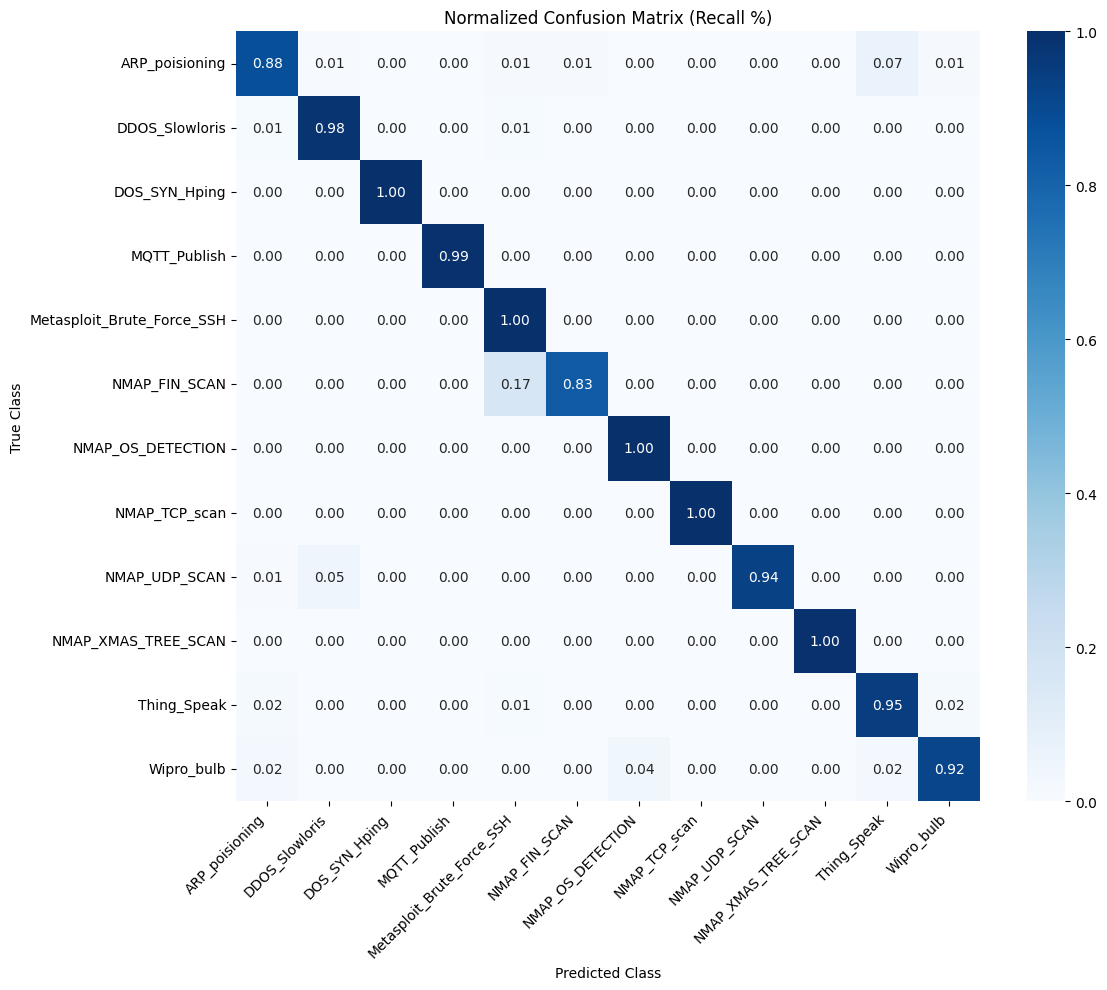

In [ ]:
# 2. Per-Class F1, Precision, Recall & Macro Average
# --------------------------------------------------
print("--- Classification Report (Focus on 'Macro Avg' and Per-Class F1) ---")
# This prints Precision, Recall, and F1 for EVERY class, plus the Macro Avg at the bottom
print(classification_report(y_test, y_pred))
# 3. ROC-AUC Score (One-vs-Rest, Macro Average)
# ---------------------------------------------
# multi_class='ovr': compares each class against all others (One-vs-Rest)
# average='macro': treats all classes equally (crucial for your rare attacks)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print(f"One-vs-Rest ROC-AUC Score (Macro): {roc_auc:.4f}")
# 4. Normalized Confusion Matrix Visualization
# --------------------------------------------
# normalize='true' converts raw counts to percentages (Recall) per row.
# This helps you see: "Of all real Brute Force attacks, what % did we catch?"
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.2f',       # Shows 2 decimal places (e.g., 0.85)
    cmap='Blues',
    xticklabels=log_reg_1.classes_,
    yticklabels=log_reg_1.classes_
)
plt.title('Normalized Confusion Matrix (Recall %)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=45, ha='right')
plt.show()

(To write professionally)  
How to interpret the Normalized Matrix
Look at the diagonal: A value of 0.95 means the model caught 95% of the attacks for that specific class.

Look off-diagonal: If you see a 0.30 in a spot that isn't on the diagonal, it means 30% of that attack type was confused for something else.

## **Phase 3: Feature Reduction**

In [ ]:
# --- Phase 3: Tree-Based Feature Selection ---

# 1. Fit Random Forest on the processed training data
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# 2. Extract Feature Importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_k = 25

# Get top 25 feature names
top_features = X_train.columns[indices[:top_k]]
print(f"Top {top_k} Features: {list(top_features)}")


# 3. Filter the Datasets (FIXED — use X_train and X_test)
X_train_top25 = X_train[top_features]
X_test_top25 = X_test[top_features]

# 4. Reconstruct Train and Test DataFrames for Export
df_train_export = X_train_top25.copy()
df_train_export['target'] = y_train
df_train_export['split'] = 'train'

df_test_export = X_test_top25.copy()
df_test_export['target'] = y_test
df_test_export['split'] = 'test'

# 5. Combine and Save
final_df_top25 = pd.concat([df_train_export, df_test_export], axis=0)
final_df_top25.to_csv('rt_iot_RF_top25.csv', index=False)

print("Exported: rt_iot_RF_top25.csv")


Top 25 Features: ['id.resp_p', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.min', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.max', 'active.avg', 'burstiness', 'flow_iat.min', 'flow_duration', 'active.min', 'flow_pkts_payload.avg', 'active.tot', 'active.max', 'fwd_iat.min', 'fwd_iat.avg', 'flow_iat.avg', 'fwd_iat.max', 'bwd_pkts_payload.max', 'service_dns', 'fwd_init_window_size', 'fwd_PSH_flag_count', 'service_mqtt', 'flow_FIN_flag_count', 'fwd_last_window_size', 'bwd_pkts_payload.avg']
Exported: rt_iot_RF_top25.csv


In [ ]:
df.shape

(123117, 49)

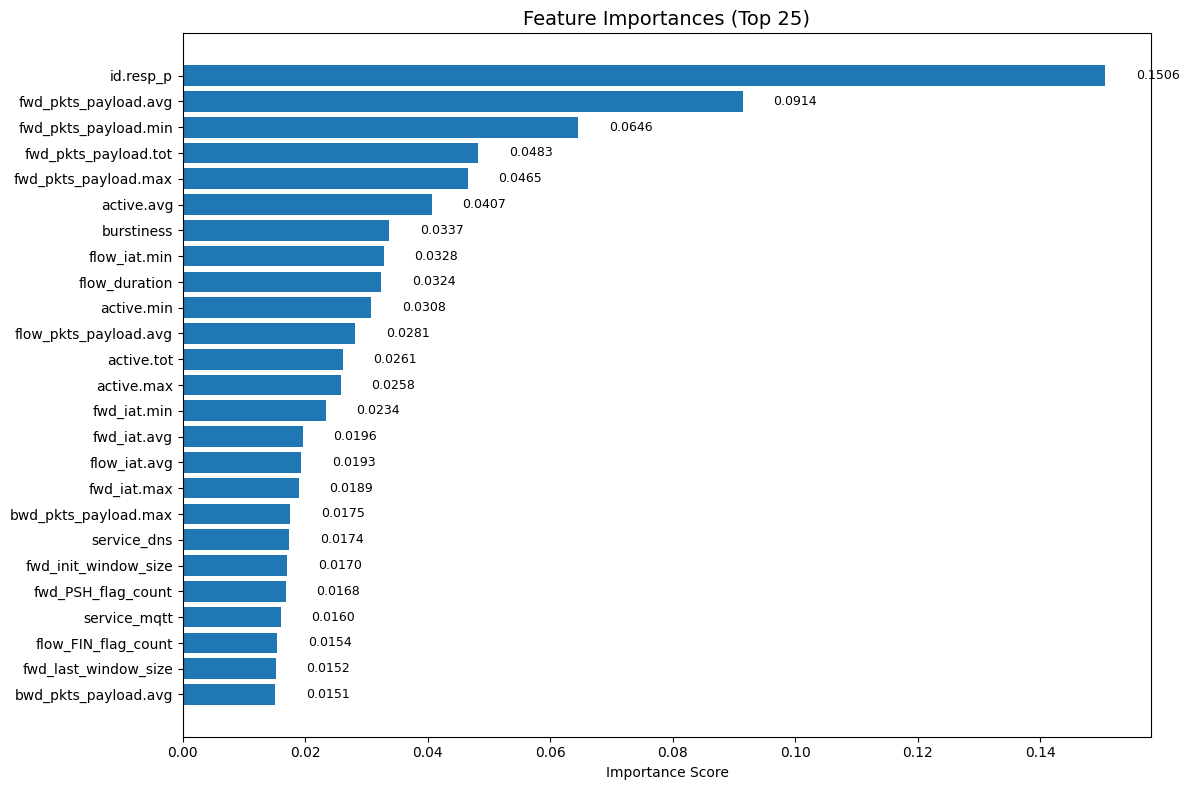

In [ ]:
# Visualization with Value Labels
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (Top 25)", fontsize=14)

bars = plt.barh(range(top_k), importances[indices[:top_k]], align="center")
plt.yticks(range(top_k), top_features)
plt.gca().invert_yaxis()

# Add labels (importance values) to each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(
        width + 0.005,          # slight offset to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f"{width:.4f}",         # formatted value
        va="center",
        fontsize=9
    )

plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## Checking Logistics Regression performance after feature reduction from RF





In [ ]:
# ---------------------------------------------------------
# 1. Train Logistic Regression (Scenario 2)
# ---------------------------------------------------------
print(f"Training Logistic Regression on Top {X_train_top25.shape[1]} features...")

log_reg_2 = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42,
    max_iter=5000,
    class_weight='balanced',
    n_jobs=-1
)
# Fit on the RF-selected features
log_reg_2.fit(X_train_top25, y_train)
# Generate Predictions
y_pred_2 = log_reg_2.predict(X_test_top25)
y_pred_proba_2 = log_reg_2.predict_proba(X_test_top25)

Training Logistic Regression on Top 25 features...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Scenario 2 Results: Top 25 RF Features ---
                            precision    recall  f1-score   support

            ARP_poisioning       0.96      0.85      0.90      1550
            DDOS_Slowloris       0.71      0.99      0.82       107
             DOS_SYN_Hping       1.00      1.00      1.00     18932
              MQTT_Publish       1.00      1.00      1.00       829
Metasploit_Brute_Force_SSH       0.17      1.00      0.30         7
             NMAP_FIN_SCAN       0.22      0.83      0.34         6
         NMAP_OS_DETECTION       0.99      1.00      1.00       400
             NMAP_TCP_scan       0.90      1.00      0.95       200
             NMAP_UDP_SCAN       0.89      0.94      0.91       518
       NMAP_XMAS_TREE_SCAN       0.99      1.00      0.99       402
               Thing_Speak       0.94      0.92      0.93      1622
                Wipro_bulb       0.39      0.84      0.53        51

                  accuracy                           0.98     24624

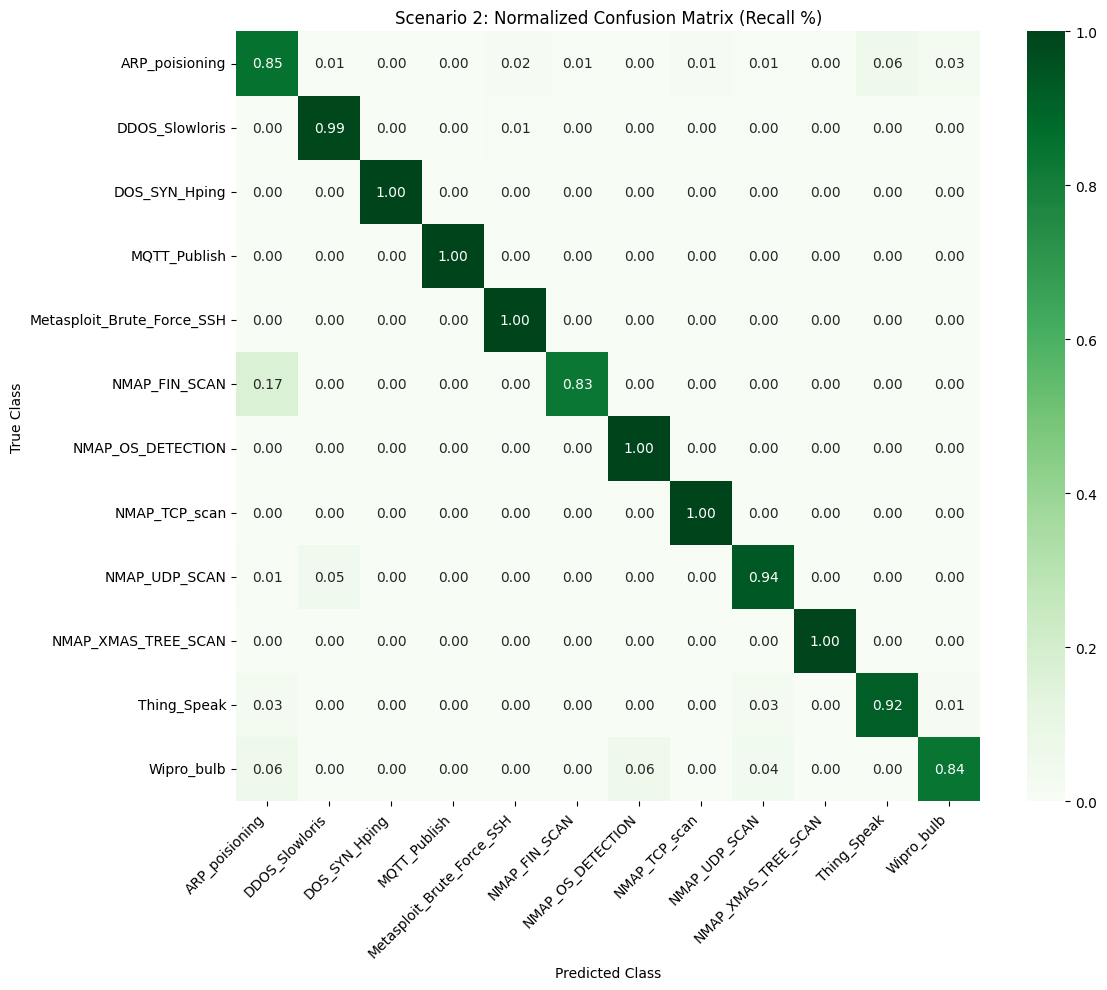

In [ ]:
# A. Classification Report (Focus on Macro Avg)
print("--- Scenario 2 Results: Top 25 RF Features ---")
print(classification_report(y_test, y_pred_2))
# B. ROC-AUC Score (Macro)
roc_auc_2 = roc_auc_score(y_test, y_pred_proba_2, multi_class='ovr', average='macro')
print(f"Scenario 2 ROC-AUC Score (Macro): {roc_auc_2:.4f}")
# C. Normalized Confusion Matrix
cm_normalized_2 = confusion_matrix(y_test, y_pred_2, normalize='true')

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized_2,
    annot=True,
    fmt='.2f',
    cmap='Greens',  # Using Green to distinguish from Scenario 1
    xticklabels=log_reg_2.classes_,
    yticklabels=log_reg_2.classes_
)
plt.title('Scenario 2: Normalized Confusion Matrix (Recall %)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=45, ha='right')
plt.show()

The Verdict: Scenario 2 is the "Efficiency Winner"
This is a fantastic result. You have successfully reduced your feature set significantly (likely from 80+ down to 25) while maintaining nearly identical performance.  

*   NMAP_FIN_SCAN (True Class) is still being confused with ARP_poisoning (17% of the time). But its precision got improved from 0.14 (Scenario 1) to 0.22 (Scenario 2).
*   Wipro_bulb lost some sensitivity, with 6% now being misclassified as DDOS_Slowloris.
  
Still, Scenario 2 is the current champion. A model with 25 features is faster to train, faster to run in production, and less likely to break when data changes in the future. The tiny drop in Wipro_bulb detection is an acceptable trade-off for the massive gain in efficiency.  


In [ ]:
df.shape

(123117, 49)

In [ ]:
df.columns

Index(['id.resp_p', 'proto', 'service', 'flow_duration', 'fwd_pkts_tot',
       'bwd_pkts_tot', 'fwd_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_min',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'fwd_URG_flag_count',
       'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload.min',
       'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg',
       'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max',
       'bwd_pkts_payload.avg', 'flow_pkts_payload.min',
       'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.min',
       'fwd_iat.max', 'fwd_iat.avg', 'bwd_iat.min', 'bwd_iat.max',
       'bwd_iat.avg', 'bwd_iat.std', 'flow_iat.min', 'flow_iat.avg',
       'active.min', 'active.max', 'active.tot', 'active.avg', 'idle.std',
       'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_win

In [ ]:
raw_numeric_cols = [
  col for col in df.columns
  if df[col].dtype != 'object' and col != 'target'
]
len(raw_numeric_cols)

46

In [ ]:
raw_continuous = [
  col for col in raw_numeric_cols
  if df[col].nunique() > 10
]
len(raw_continuous)

38

In [ ]:
for col in raw_numeric_cols:
  if df[col].nunique()<=10:
    print(col)

fwd_header_size_min
fwd_header_size_max
bwd_header_size_min
flow_SYN_flag_count
flow_RST_flag_count
fwd_URG_flag_count
flow_CWR_flag_count
flow_ECE_flag_count


In [ ]:
# --- FINAL PCA (Raw Continuous → Scaled → PCA) ---

# 0. Extract RAW numeric continuous features BEFORE encoding
raw_numeric_cols = [
  col for col in df.columns
  if df[col].dtype != 'object' and col != 'target'
]

# Remove columns with low unique values (binary/categorical disguised as numeric)
raw_continuous = [
  col for col in raw_numeric_cols
  if df[col].nunique() > 10
]

print("Raw continuous columns:", raw_continuous)
print("Total:", len(raw_continuous))

# 1. Scale RAW continuous features
scaler = StandardScaler()

X_cont_train = scaler.fit_transform(df.loc[X_train.index, raw_continuous])
X_cont_test  = scaler.transform(df.loc[X_test.index, raw_continuous])

print("Shapes for PCA:", X_cont_train.shape, X_cont_test.shape)

# 2. PCA on scaled raw numeric features
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_cont_train)
X_test_pca  = pca.transform(X_cont_test)

print("PCA components:", pca.n_components_)

# 3. Create PCA DF
pca_cols = [f"PC{i+1}" for i in range(pca.n_components_)]

df_train_pca = pd.DataFrame(X_train_pca, columns=pca_cols, index=X_train.index)
df_test_pca  = pd.DataFrame(X_test_pca,  columns=pca_cols, index=X_test.index)

df_train_pca['target'] = y_train
df_train_pca['split'] = 'train'

df_test_pca['target'] = y_test
df_test_pca['split'] = 'test'

final_df_pca = pd.concat([df_train_pca, df_test_pca], axis=0)
final_df_pca.to_csv("rt_iot_PCA.csv", index=False)

print("Exported: rt_iot_PCA.csv")


Raw continuous columns: ['id.resp_p', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_pkts_per_sec', 'down_up_ratio', 'flow_FIN_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.avg', 'flow_pkts_payload.min', 'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.avg', 'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.avg', 'bwd_iat.std', 'flow_iat.min', 'flow_iat.avg', 'active.min', 'active.max', 'active.tot', 'active.avg', 'idle.std', 'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size', 'burstiness']
Total: 38
Shapes for PCA: (98493, 38) (24624, 38)
PCA components: 19
Exported: rt_iot_PCA.csv


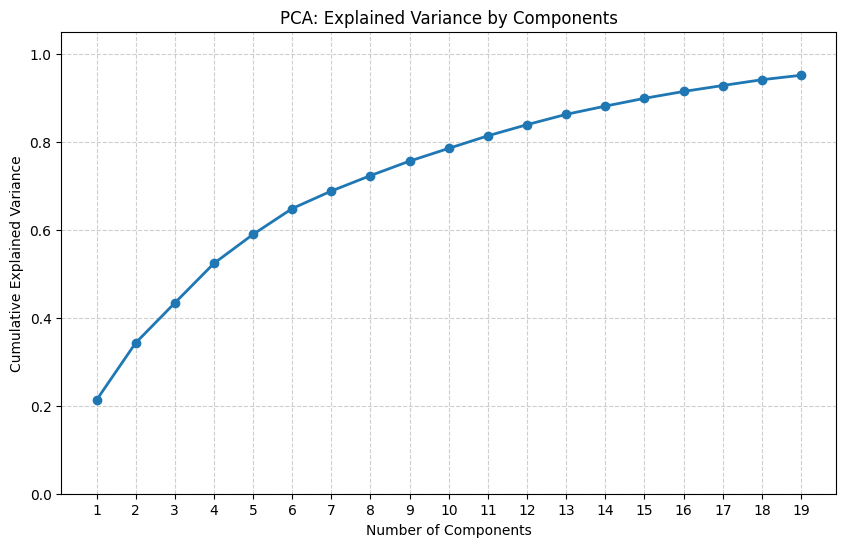

In [ ]:
plt.figure(figsize=(10, 6))
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(
    range(1, len(cum_var) + 1),
    cum_var,
    marker='o',
    linestyle='-',
    linewidth=2,
)

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance by Components")
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1.05)
plt.xticks(range(1, len(cum_var) + 1))

plt.show()


## Checking Logistics Regression performance after PCA (excluding 2 categorical features)  
## Performance is worse than RF in this case when we exclude categorical features to LR


In [ ]:
# ---------------------------------------------------------
# 1. Train Logistic Regression (Scenario 3: PCA)
# ---------------------------------------------------------
print(f"Training Logistic Regression on {X_train_pca.shape[1]} PCA Components...")

log_reg_3 = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42,
    max_iter=5000,
    class_weight='balanced',
    n_jobs=-1
)
# Fit on the PCA-transformed data
log_reg_3.fit(X_train_pca, y_train)
# Generate Predictions
y_pred_3 = log_reg_3.predict(X_test_pca)
y_pred_proba_3 = log_reg_3.predict_proba(X_test_pca)

Training Logistic Regression on 19 PCA Components...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Scenario 3 Results: PCA Transformed ---
                            precision    recall  f1-score   support

            ARP_poisioning       0.91      0.68      0.78      1550
            DDOS_Slowloris       0.56      0.99      0.71       107
             DOS_SYN_Hping       1.00      1.00      1.00     18932
              MQTT_Publish       1.00      0.99      0.99       829
Metasploit_Brute_Force_SSH       0.16      1.00      0.27         7
             NMAP_FIN_SCAN       0.14      0.83      0.24         6
         NMAP_OS_DETECTION       0.99      1.00      1.00       400
             NMAP_TCP_scan       0.98      1.00      0.99       200
             NMAP_UDP_SCAN       0.88      0.88      0.88       518
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       402
               Thing_Speak       0.86      0.92      0.89      1622
                Wipro_bulb       0.25      0.78      0.38        51

                  accuracy                           0.97     24624
  

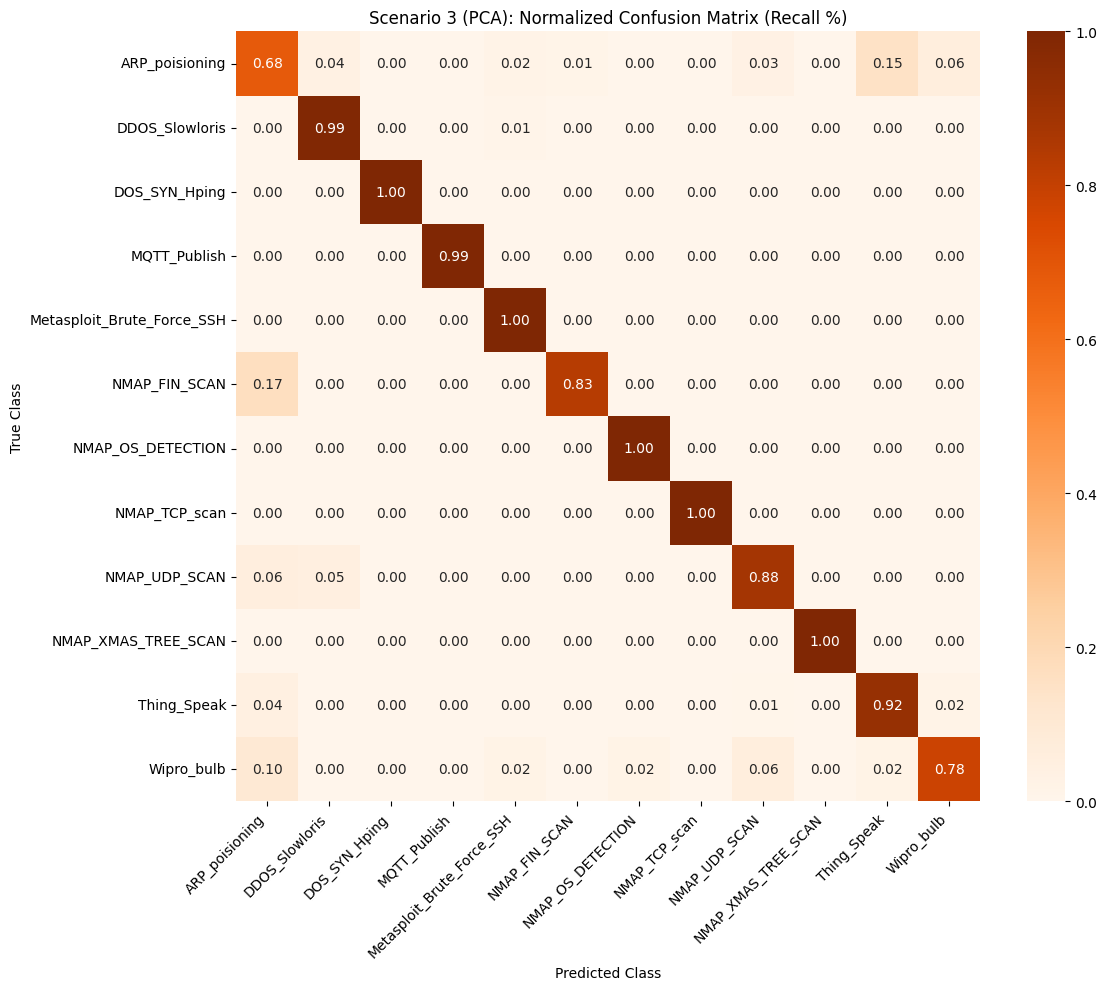

In [ ]:
# A. Classification Report (Macro Avg)
print("--- Scenario 3 Results: PCA Transformed ---")
print(classification_report(y_test, y_pred_3))

# B. ROC-AUC Score (Macro)
roc_auc_3 = roc_auc_score(y_test, y_pred_proba_3, multi_class='ovr', average='macro')
print(f"Scenario 3 ROC-AUC Score (Macro): {roc_auc_3:.4f}")

# C. Normalized Confusion Matrix
cm_normalized_3 = confusion_matrix(y_test, y_pred_3, normalize='true')

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized_3,
    annot=True,
    fmt='.2f',
    cmap='Oranges',  # Orange for PCA
    xticklabels=log_reg_3.classes_,
    yticklabels=log_reg_3.classes_
)
plt.title('Scenario 3 (PCA): Normalized Confusion Matrix (Recall %)')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=45, ha='right')
plt.show()

## Checking Logistics Regression performance after PCA (INCL. 2 categorical features)  

In [ ]:
# ---------------------------------------------------------
# 1. Prepare the Data (Merge PCA + OHE)
# ---------------------------------------------------------

# A. Identify the One-Hot Encoded columns in the original X_train
# (These are the ones starting with 'proto_' or 'service_')
categorical_cols_ohe = [col for col in X_train.columns if col.startswith('proto_') or col.startswith('service_')]
print(f"Found {len(categorical_cols_ohe)} categorical OHE columns.")

Found 11 categorical OHE columns.


In [ ]:
# B. Extract only those columns from the original X_train/X_test
# CRITICAL: We use the index to ensure rows match perfectly
X_train_cats = X_train.loc[X_train.index, categorical_cols_ohe]
X_test_cats  = X_test.loc[X_test.index,  categorical_cols_ohe]

# C. Convert the PCA result arrays into DataFrames with the correct Index
# (Recall: X_train_pca was a numpy array)
pca_cols = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_cols, index=X_train.index)
X_test_pca_df  = pd.DataFrame(X_test_pca,  columns=pca_cols, index=X_test.index)
# D. Concatenate them side-by-side
X_train_hybrid = pd.concat([X_train_pca_df, X_train_cats], axis=1)
X_test_hybrid  = pd.concat([X_test_pca_df,  X_test_cats],  axis=1)
print("Hybrid Training Shape:", X_train_hybrid.shape)

Hybrid Training Shape: (98493, 30)


In [ ]:
# ---------------------------------------------------------
# 2. Train Logistic Regression (Scenario 4: Hybrid)
# ---------------------------------------------------------
print(f"Training on Hybrid Data ({X_train_hybrid.shape[1]} features)...")

log_reg_4 = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42,
    max_iter=5000,
    class_weight='balanced',
    n_jobs=-1
)

Training on Hybrid Data (30 features)...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


--- Scenario 4 Results: Hybrid (PCA + Categorical) ---
                            precision    recall  f1-score   support

            ARP_poisioning       0.96      0.79      0.87      1550
            DDOS_Slowloris       0.74      0.98      0.84       107
             DOS_SYN_Hping       1.00      1.00      1.00     18932
              MQTT_Publish       1.00      1.00      1.00       829
Metasploit_Brute_Force_SSH       0.26      1.00      0.41         7
             NMAP_FIN_SCAN       0.13      0.83      0.22         6
         NMAP_OS_DETECTION       0.99      1.00      1.00       400
             NMAP_TCP_scan       0.97      1.00      0.99       200
             NMAP_UDP_SCAN       0.97      0.94      0.95       518
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       402
               Thing_Speak       0.87      0.94      0.90      1622
                Wipro_bulb       0.37      0.90      0.53        51

                  accuracy                           0.98  

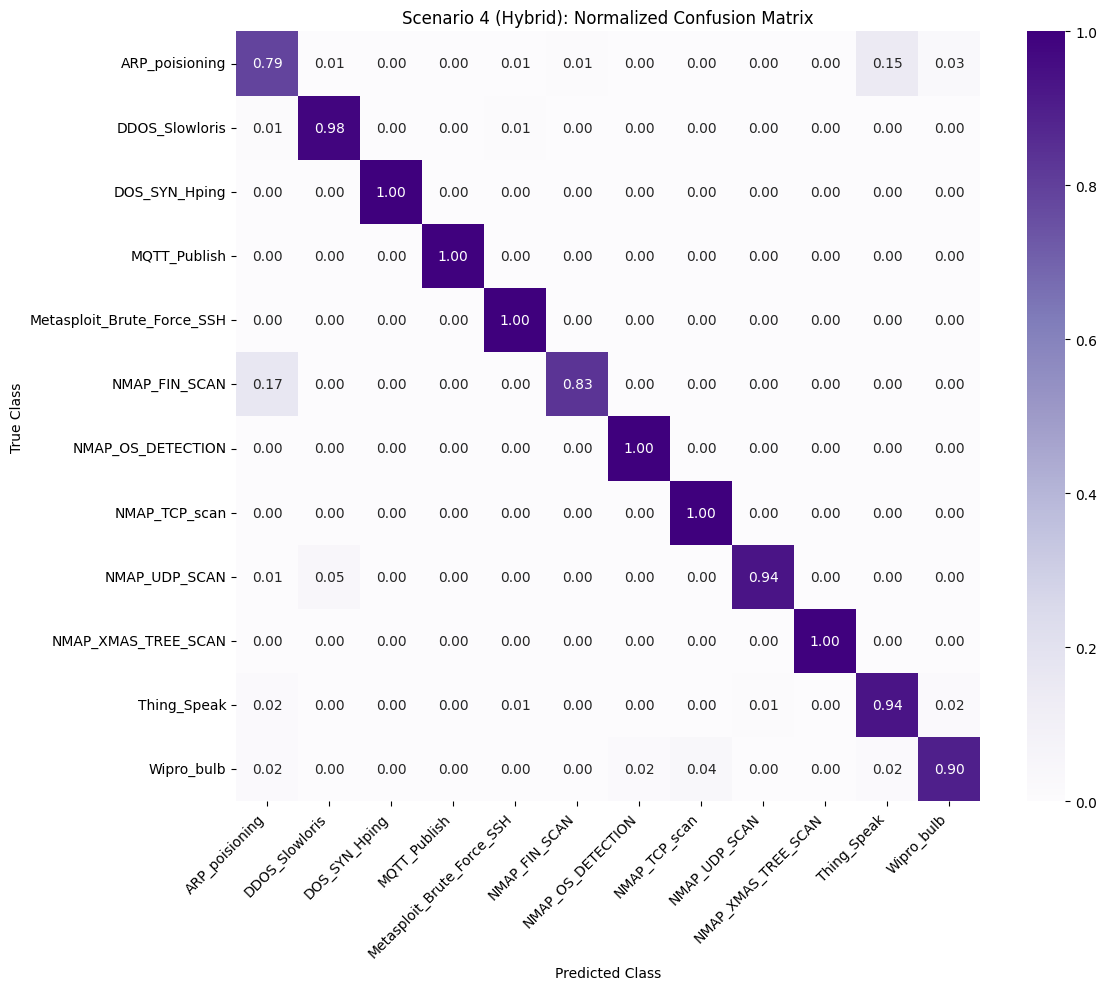

In [ ]:
log_reg_4.fit(X_train_hybrid, y_train)
y_pred_4 = log_reg_4.predict(X_test_hybrid)
y_pred_proba_4 = log_reg_4.predict_proba(X_test_hybrid)

# A. Classification Report
print("--- Scenario 4 Results: Hybrid (PCA + Categorical) ---")
print(classification_report(y_test, y_pred_4))

# B. ROC-AUC
roc_auc_4 = roc_auc_score(y_test, y_pred_proba_4, multi_class='ovr', average='macro')
print(f"Scenario 4 ROC-AUC Score (Macro): {roc_auc_4:.4f}")

# C. Visualization (Purple for Hybrid)
cm_normalized_4 = confusion_matrix(y_test, y_pred_4, normalize='true')

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_normalized_4,
    annot=True,
    fmt='.2f',
    cmap='Purples',
    xticklabels=log_reg_4.classes_,
    yticklabels=log_reg_4.classes_
)
plt.title('Scenario 4 (Hybrid): Normalized Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=45, ha='right')
plt.show()

# Random Forest VS XGBoost with Optimal Parameters
# Side by Side Comparison of Accuracy Metrics

===== Overall Metric Comparison =====
               Accuracy  Macro F1  Weighted F1  Macro ROC-AUC
Model                                                        
Random Forest  0.997157  0.972803     0.997150       0.999944
XGBoost        0.997604  0.958318     0.997615       0.999964

===== Random Forest Classification Report =====
                            precision    recall  f1-score   support

            ARP_poisioning       0.98      0.99      0.98      1550
            DDOS_Slowloris       0.96      0.92      0.94       107
             DOS_SYN_Hping       1.00      1.00      1.00     18932
              MQTT_Publish       1.00      1.00      1.00       829
Metasploit_Brute_Force_SSH       1.00      0.86      0.92         7
             NMAP_FIN_SCAN       1.00      0.83      0.91         6
         NMAP_OS_DETECTION       1.00      1.00      1.00       400
             NMAP_TCP_scan       1.00      1.00      1.00       200
             NMAP_UDP_SCAN       0.98      0.98     

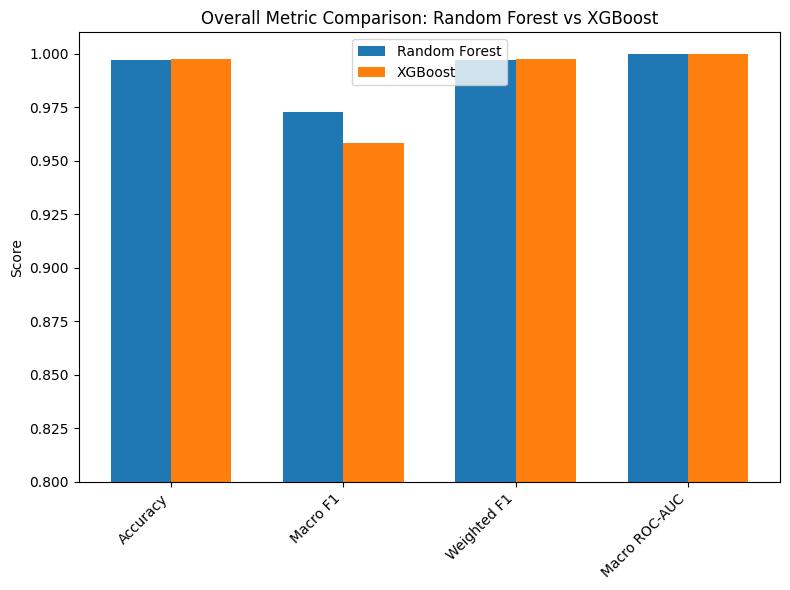

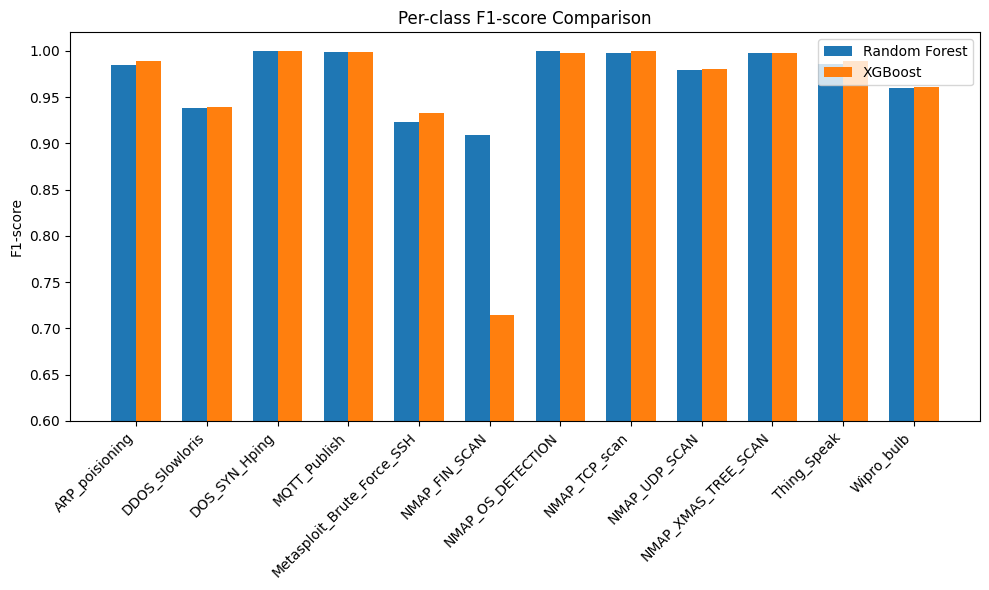

In [ ]:
# ===== Compare Random Forest vs XGBoost on RT-IoT2022 =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

RANDOM_STATE = 42

# ---------------------------------------------------------------------
# 1. Data prep
# ---------------------------------------------------------------------
#df = pd.read_csv("rt_iot_RF_top25.csv")

df = final_df_top25.copy()

df["split"] = df["split"].astype(str)
df["service_dns"] = df["service_dns"].astype("category")
df["service_mqtt"] = df["service_mqtt"].astype("category")
df["id.resp_p"] = df["id.resp_p"].astype("category")

df["target"] = df["target"].astype(str)

train_df = df[df["split"] == "train"].copy()
test_df  = df[df["split"] == "test"].copy()

feature_cols = [c for c in df.columns if c not in ["target", "split"]]
cat_features = ["service_dns", "service_mqtt", "id.resp_p"]
num_features = [c for c in feature_cols if c not in cat_features]

X_train = train_df[feature_cols]
X_test  = test_df[feature_cols]
y_train_raw = train_df["target"]
y_test_raw  = test_df["target"]

# Encode target
label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train_raw)
y_test  = label_enc.transform(y_test_raw)
class_names = label_enc.classes_
num_classes = len(class_names)

# Class/sample weights for imbalance (for XGBoost)
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight_dict = dict(zip(classes, class_weights))
sample_weight = np.array([class_weight_dict[c] for c in y_train])

# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features),
    ]
)

# ---------------------------------------------------------------------
# 2. Define both models with best hyperparameters
# ---------------------------------------------------------------------
# Random Forest best params (from grid search)
#'model__class_weight': None, 'model__max_depth': None, 'model__max_features': 'log2',
# 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 400
rf = RandomForestClassifier(          #######################################################
    n_estimators=400,
    max_depth=None,
    max_features="log2",
    min_samples_split=10,
    min_samples_leaf=1,
    class_weight=None,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

pipe_rf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", rf),
    ]
)

# XGBoost best params (from grid search)
# 'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 800, 'model__subsample': 0.8
xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=num_classes,
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_estimators=800,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
)

pipe_xgb = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", xgb),
    ]
)

# ---------------------------------------------------------------------
# 3. Fit both models
# ---------------------------------------------------------------------
pipe_rf.fit(X_train, y_train)
pipe_xgb.fit(X_train, y_train, model__sample_weight=sample_weight)

# ---------------------------------------------------------------------
# 4. Evaluate both on test set
# ---------------------------------------------------------------------
results = {}

# --- Random Forest ---
y_pred_rf = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_macro_rf = f1_score(y_test, y_pred_rf, average="macro")
f1_weighted_rf = f1_score(y_test, y_pred_rf, average="weighted")
y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))
roc_auc_rf = roc_auc_score(y_test_bin, y_proba_rf, average="macro", multi_class="ovr")

report_rf = classification_report(
    y_test,
    y_pred_rf,
    target_names=class_names,
    output_dict=True
)
cm_rf = confusion_matrix(y_test, y_pred_rf)

results["Random Forest"] = {
    "accuracy": acc_rf,
    "f1_macro": f1_macro_rf,
    "f1_weighted": f1_weighted_rf,
    "roc_auc_macro": roc_auc_rf,
    "report": report_rf,
    "cm": cm_rf,
}

# --- XGBoost ---
y_pred_xgb = pipe_xgb.predict(X_test)
y_proba_xgb = pipe_xgb.predict_proba(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_macro_xgb = f1_score(y_test, y_pred_xgb, average="macro")
f1_weighted_xgb = f1_score(y_test, y_pred_xgb, average="weighted")
roc_auc_xgb = roc_auc_score(y_test_bin, y_proba_xgb, average="macro", multi_class="ovr")

report_xgb = classification_report(
    y_test,
    y_pred_xgb,
    target_names=class_names,
    output_dict=True
)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

results["XGBoost"] = {
    "accuracy": acc_xgb,
    "f1_macro": f1_macro_xgb,
    "f1_weighted": f1_weighted_xgb,
    "roc_auc_macro": roc_auc_xgb,
    "report": report_xgb,
    "cm": cm_xgb,
}

# ---------------------------------------------------------------------
# 5. Print metric summary
# ---------------------------------------------------------------------
summary_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [acc_rf, acc_xgb],
    "Macro F1": [f1_macro_rf, f1_macro_xgb],
    "Weighted F1": [f1_weighted_rf, f1_weighted_xgb],
    "Macro ROC-AUC": [roc_auc_rf, roc_auc_xgb],
}).set_index("Model")

print("===== Overall Metric Comparison =====")
print(summary_df)

print("\n===== Random Forest Classification Report =====")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

print("===== XGBoost Classification Report =====")
print(classification_report(y_test, y_pred_xgb, target_names=class_names))

# ---------------------------------------------------------------------
# 6. Plot: Overall metrics comparison
# ---------------------------------------------------------------------
metrics_to_plot = ["Accuracy", "Macro F1", "Weighted F1", "Macro ROC-AUC"]

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_to_plot))
width = 0.35

rf_vals = [summary_df.loc["Random Forest", m] for m in metrics_to_plot]
xgb_vals = [summary_df.loc["XGBoost", m] for m in metrics_to_plot]

plt.bar(x - width/2, rf_vals, width, label="Random Forest")
plt.bar(x + width/2, xgb_vals, width, label="XGBoost")

plt.xticks(x, metrics_to_plot, rotation=45, ha="right")
plt.ylabel("Score")
plt.ylim(0.8, 1.01)
plt.title("Overall Metric Comparison: Random Forest vs XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 7. Plot: Per-class F1 comparison (side-by-side)
# ---------------------------------------------------------------------
per_class_f1_rf = [results["Random Forest"]["report"][label]["f1-score"] for label in class_names]
per_class_f1_xgb = [results["XGBoost"]["report"][label]["f1-score"] for label in class_names]

plt.figure(figsize=(10, 6))
x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, per_class_f1_rf, width, label="Random Forest")
plt.bar(x + width/2, per_class_f1_xgb, width, label="XGBoost")

plt.xticks(x, class_names, rotation=45, ha="right")
plt.ylabel("F1-score")
plt.ylim(0.6, 1.02)
plt.title("Per-class F1-score Comparison")
plt.legend()
plt.tight_layout()
plt.show()


# Multi-Layer Perceptron for Classification

In [ ]:
# ---------------------------------------------------------
# Standard MLP Architecture (use for ALL models)
# ---------------------------------------------------------

def build_standard_mlp(num_features, num_classes, model_name="MLP"):
    """
    Build a standardized MLP architecture for consistent comparison.

    Parameters:
    -----------
    num_features : int
        Number of input features
    num_classes : int
        Number of output classes
    model_name : str
        Name for the model

    Returns:
    --------
    model : keras.Sequential
        Compiled MLP model
    """
    model = keras.Sequential([
        layers.Input(shape=(num_features,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax")
    ], name=model_name)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

## MLP with RF selected Top 25 Variables

Top-25 Training Shape: (98493, 25)
Top-25 Test Shape: (24624, 25)
Number of classes: 12

Model Summary:


Model: "MLP_Top25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,060 (54.92 KB)

 Trainable params: 14,060 (54.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6362 - loss: 2.5356 - val_accuracy: 0.8490 - val_loss: 0.6714
Epoch 2/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8423 - loss: 0.6730 - val_accuracy: 0.9261 - val_loss: 0.2617
Epoch 3/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8983 - loss: 0.3314 - val_accuracy: 0.9259 - val_loss: 0.1886
Epoch 4/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9201 - loss: 0.2276 - val_accuracy: 0.9317 - val_loss: 0.1660
Epoch 5/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9269 - loss: 0.1921 - val_accuracy: 0.9603 - val_loss: 0.1488
Epoch 6/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9286 - loss: 0.1750 - val_accuracy: 0.9462 - val_loss: 0.1417
Epoch 7/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9314 - loss: 0.1723 - val_accuracy: 0.9467 - val_loss: 0.1354
Epoch 8/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9368 - loss: 0.1538 - val_accuracy

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


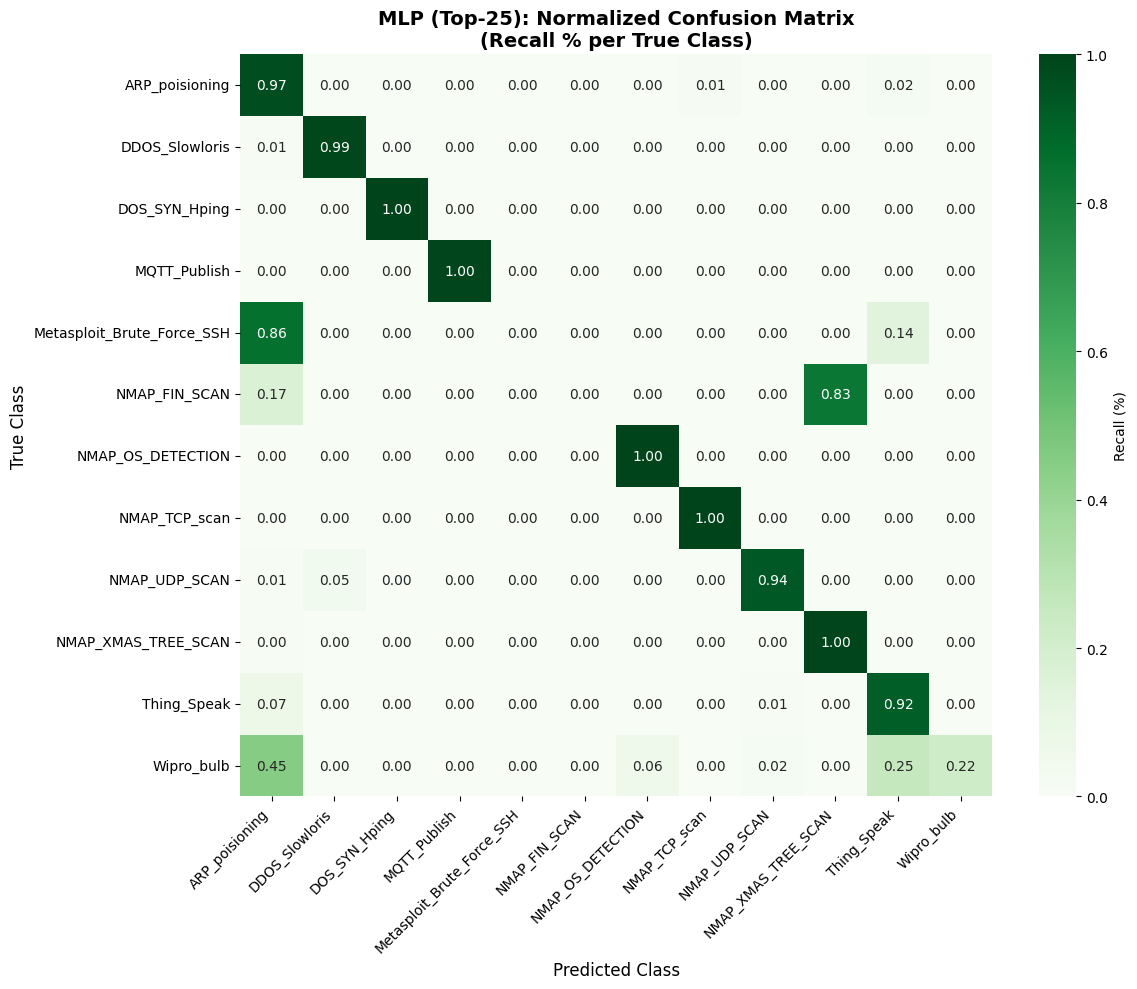

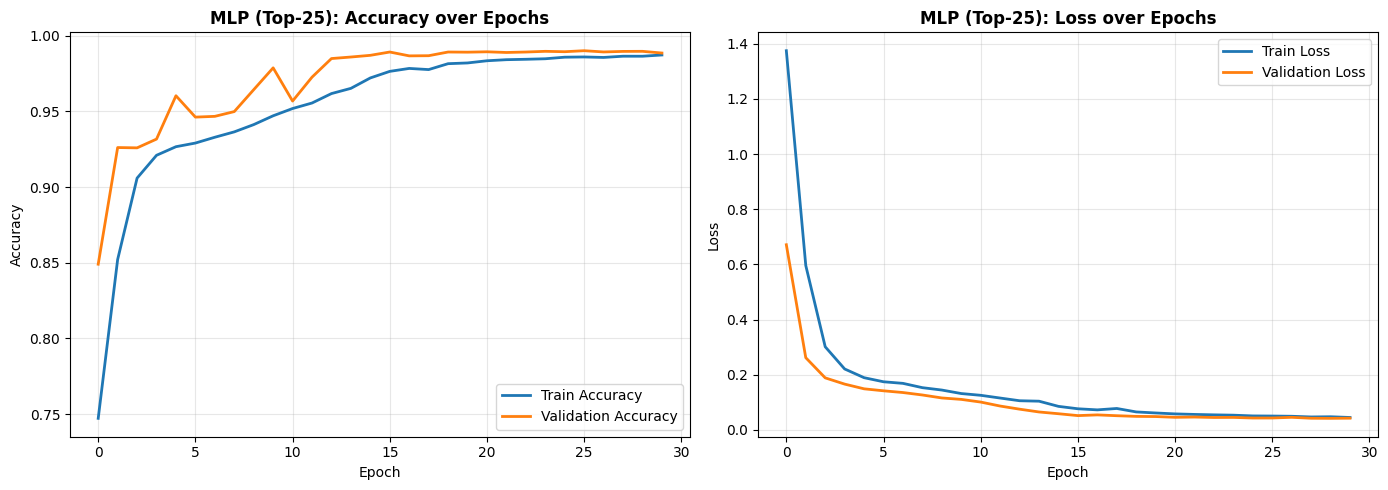

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras import layers
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# Helper Functions
# ---------------------------------------------------------

def to_dense_numeric(X):
    """Convert DataFrame or sparse matrix to dense numpy array."""
    if hasattr(X, "toarray"):
        return X.toarray().astype("float32")
    else:
        return np.asarray(X, dtype="float32")

def build_standard_mlp(num_features, num_classes, model_name="MLP"):
    """Build standardized MLP architecture."""
    model = keras.Sequential([
        layers.Input(shape=(num_features,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax")
    ], name=model_name)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# ---------------------------------------------------------
# 1. Prepare Data
# ---------------------------------------------------------

# Use already prepared encoded labels and class names from the previous section
y_tr = y_train # y_train is already integer encoded
y_te = y_test  # y_test is already integer encoded

# Convert features to dense arrays
X_tr_top = to_dense_numeric(X_train_top25)
X_te_top = to_dense_numeric(X_test_top25)

print(f"Top-25 Training Shape: {X_tr_top.shape}")
print(f"Top-25 Test Shape: {X_te_top.shape}")
print(f"Number of classes: {len(class_names)}") # Use class_names from global scope

# ---------------------------------------------------------
# 2. Build and Train Model
# ---------------------------------------------------------

num_features_top = X_tr_top.shape[1]
num_classes = len(class_names) # Use class_names from global scope

model_top = build_standard_mlp(num_features_top, num_classes, "MLP_Top25")
print("\nModel Summary:")
model_top.summary()

history_top = model_top.fit(
    X_tr_top,
    y_tr,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    verbose=1
)

# ---------------------------------------------------------
# 3. Evaluate
# ---------------------------------------------------------

y_pred_top = model_top.predict(X_te_top)
y_pred_top_labels = np.argmax(y_pred_top, axis=1)

print("\n" + "="*60)
print("--- MLP Results: Top-25 Feature Set ---")
print("="*60)
# Use class_names from global scope for target_names
print(classification_report(y_te, y_pred_top_labels, target_names=class_names))

roc_auc_mlp = roc_auc_score(y_te, y_pred_top, multi_class='ovr', average='macro')
print(f"\nMLP (Top-25) ROC-AUC Score (Macro, OvR): {roc_auc_mlp:.4f}")
print("="*60)

# ---------------------------------------------------------
# 4. Visualizations
# ---------------------------------------------------------

# Confusion Matrix
cm_norm_mlp = confusion_matrix(y_te, y_pred_top_labels, normalize='true')
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_norm_mlp,
    annot=True,
    fmt='.2f',
    cmap='Greens',
    xticklabels=class_names, # Use class_names from global scope
    yticklabels=class_names, # Use class_names from global scope
    cbar_kws={'label': 'Recall (%)'}
)
plt.title('MLP (Top-25): Normalized Confusion Matrix\n(Recall % per True Class)',
          fontsize=14, fontweight='bold')
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Training History
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(history_top.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history_top.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('MLP (Top-25): Accuracy over Epochs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_top.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history_top.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('MLP (Top-25): Loss over Epochs', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## MLP with PCA (no categorical vars)

PCA Training Shape: (98493, 19)
PCA Test Shape: (24624, 19)

Model Summary:


Model: "MLP_PCA_Only"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,292 (51.92 KB)

 Trainable params: 13,292 (51.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7348 - loss: 1.0242 - val_accuracy: 0.9682 - val_loss: 0.1341
Epoch 2/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9501 - loss: 0.1584 - val_accuracy: 0.9740 - val_loss: 0.0919
Epoch 3/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9650 - loss: 0.1180 - val_accuracy: 0.9814 - val_loss: 0.0768
Epoch 4/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9738 - loss: 0.0941 - val_accuracy: 0.9820 - val_loss: 0.0699
Epoch 5/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9783 - loss: 0.0782 - val_accuracy: 0.9828 - val_loss: 0.0673
Epoch 6/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9802 - loss: 0.0725 - val_accuracy: 0.9843 - val_loss: 0.0623
Epoch 7/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9814 - loss: 0.0674 - val_accuracy: 0.9861 - val_loss: 0.0610
Epoch 8/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9820 - loss: 0.0628 - val_accuracy: 0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


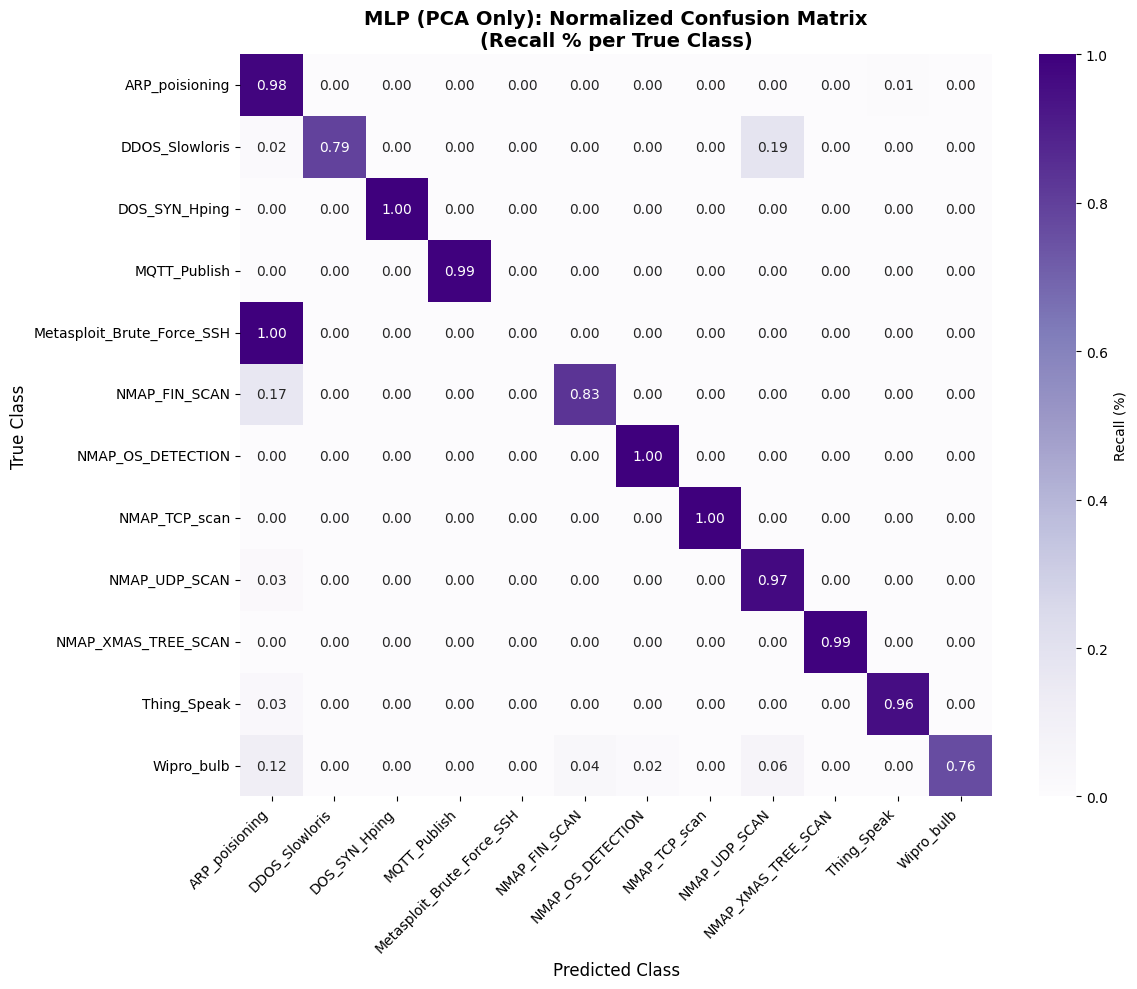

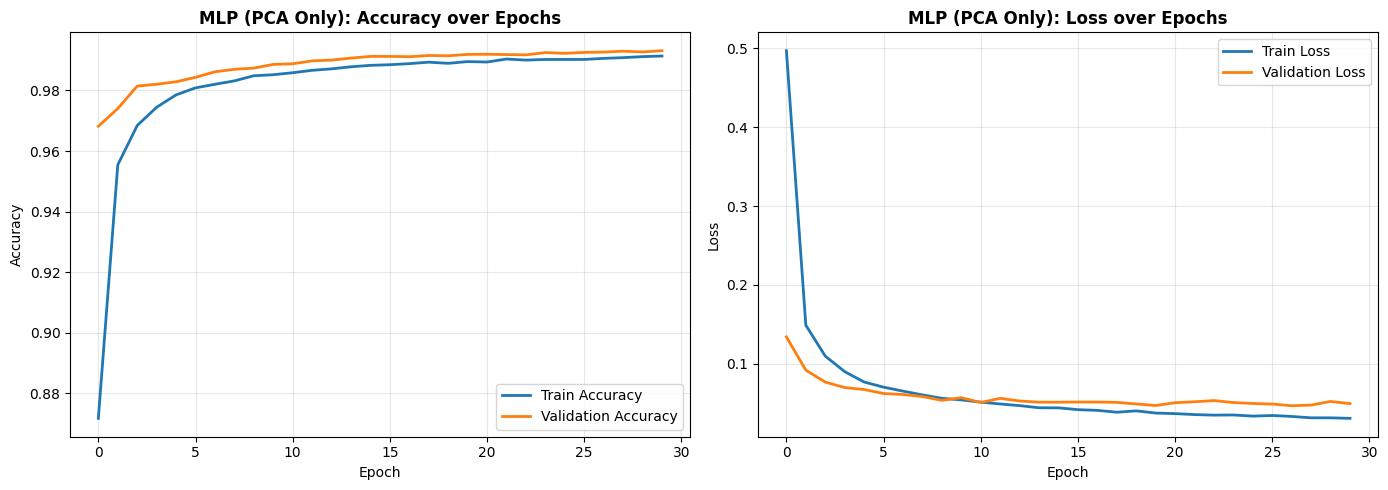

In [ ]:
# ---------------------------------------------------------
# 1. Prepare PCA Data
# ---------------------------------------------------------

pca_cols = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_cols, index=X_train.index)
X_test_pca_df  = pd.DataFrame(X_test_pca,  columns=pca_cols, index=X_test.index)

X_tr_pca = to_dense_numeric(X_train_pca_df)
X_te_pca = to_dense_numeric(X_test_pca_df)

print(f"PCA Training Shape: {X_tr_pca.shape}")
print(f"PCA Test Shape: {X_te_pca.shape}")

# ---------------------------------------------------------
# 2. Build and Train Model (Same Architecture)
# ---------------------------------------------------------

num_features_pca = X_tr_pca.shape[1]
model_pca = build_standard_mlp(num_features_pca, num_classes, "MLP_PCA_Only")

print("\nModel Summary:")
model_pca.summary()

history_pca = model_pca.fit(
    X_tr_pca,
    y_tr,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    verbose=1
)

# ---------------------------------------------------------
# 3. Evaluate
# ---------------------------------------------------------

y_pred_pca = model_pca.predict(X_te_pca)
y_pred_pca_labels = np.argmax(y_pred_pca, axis=1)

print("\n" + "="*60)
print("--- MLP Results: PCA Features Only ---")
print("="*60)
print(classification_report(y_te, y_pred_pca_labels, target_names=class_names))

roc_auc_mlp_pca = roc_auc_score(y_te, y_pred_pca, multi_class='ovr', average='macro')
print(f"\nMLP (PCA Only) ROC-AUC Score (Macro, OvR): {roc_auc_mlp_pca:.4f}")
print("="*60)

# ---------------------------------------------------------
# 4. Visualizations
# ---------------------------------------------------------

cm_norm_pca = confusion_matrix(y_te, y_pred_pca_labels, normalize='true')
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_norm_pca,
    annot=True,
    fmt='.2f',
    cmap='Purples',
    xticklabels=class_names,
    yticklabels=class_names,
    cbar_kws={'label': 'Recall (%)'}
)
plt.title('MLP (PCA Only): Normalized Confusion Matrix\n(Recall % per True Class)',
          fontsize=14, fontweight='bold')
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(history_pca.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history_pca.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('MLP (PCA Only): Accuracy over Epochs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_pca.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history_pca.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('MLP (PCA Only): Loss over Epochs', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# MLP with PCA + categorical vars

Found 2 categorical OHE columns.
Hybrid Training Shape: (98493, 21)
Hybrid Test Shape: (24624, 21)

Model Summary:


Model: "MLP_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,548 (52.92 KB)

 Trainable params: 13,548 (52.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7974 - loss: 0.9277 - val_accuracy: 0.9690 - val_loss: 0.1405
Epoch 2/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9478 - loss: 0.1655 - val_accuracy: 0.9746 - val_loss: 0.0984
Epoch 3/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9648 - loss: 0.1199 - val_accuracy: 0.9825 - val_loss: 0.0737
Epoch 4/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9733 - loss: 0.0931 - val_accuracy: 0.9863 - val_loss: 0.0593
Epoch 5/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9776 - loss: 0.0785 - val_accuracy: 0.9867 - val_loss: 0.0568
Epoch 6/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9816 - loss: 0.0706 - val_accuracy: 0.9870 - val_loss: 0.0515
Epoch 7/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9835 - loss: 0.0638 - val_accuracy: 0.9873 - val_loss: 0.0476
Epoch 8/30
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9850 - loss: 0.0568 - val_accurac

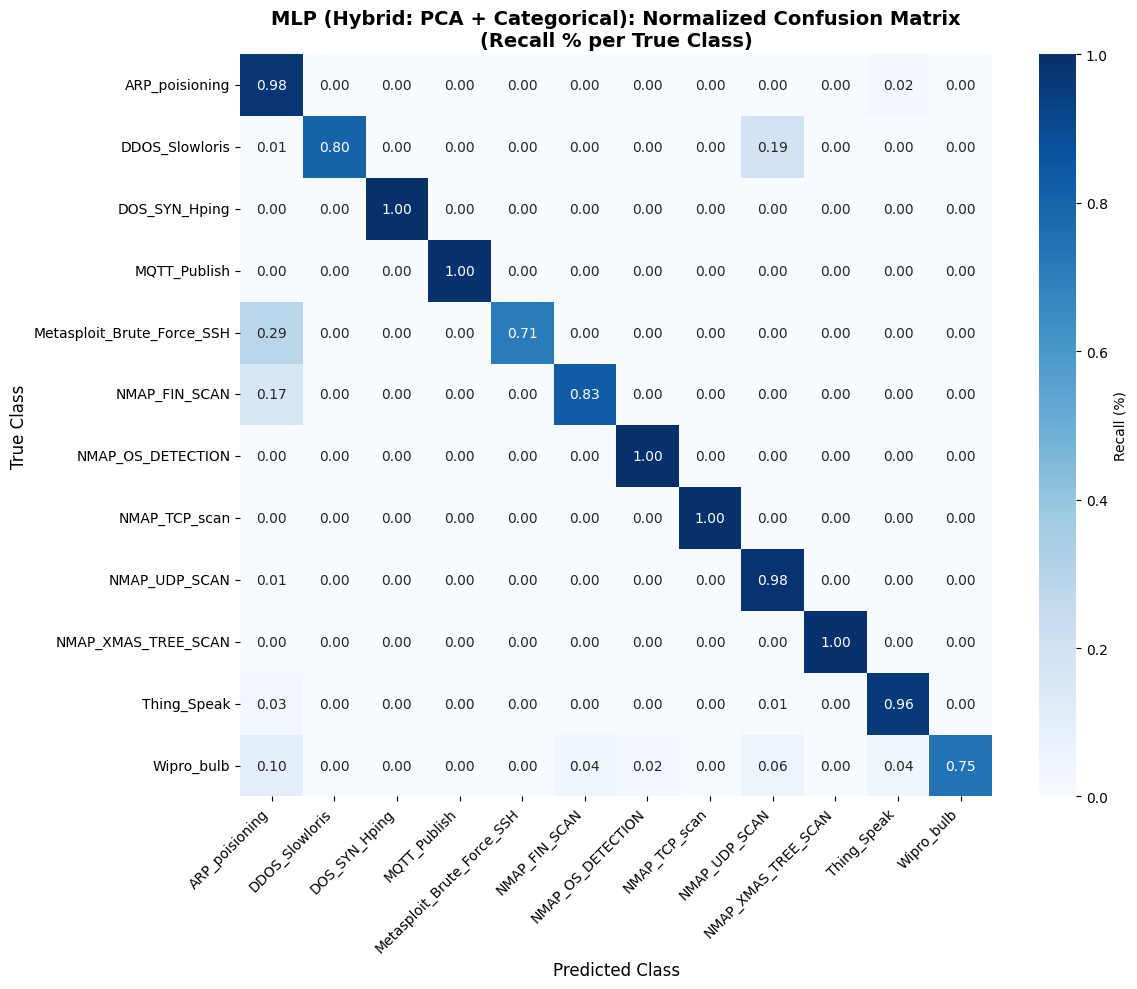

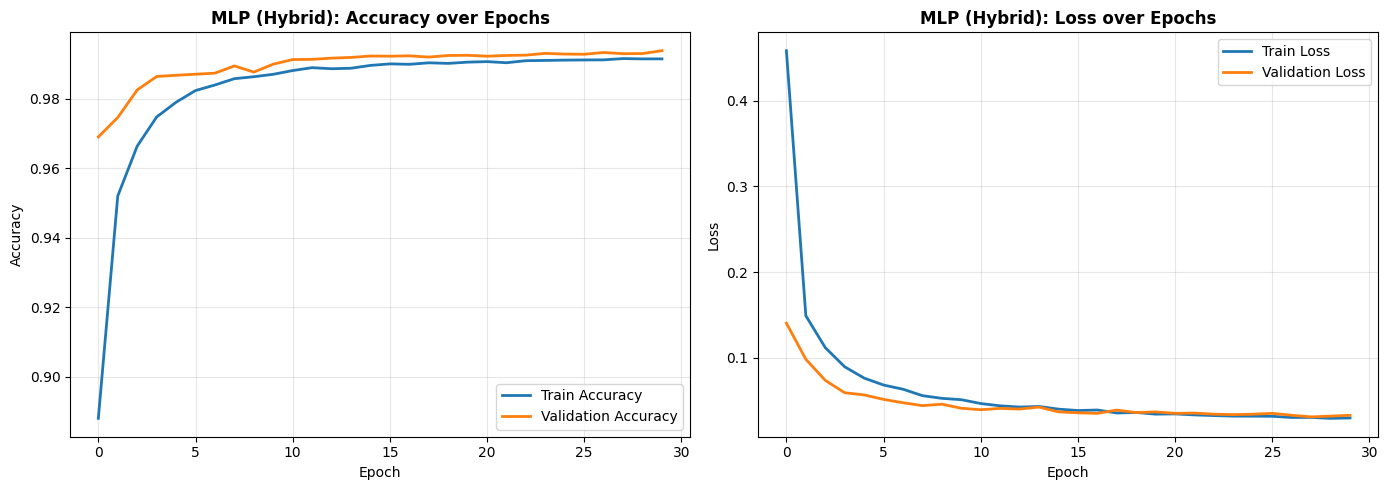

In [ ]:
# ---------------------------------------------------------
# 1. Prepare Hybrid Data
# ---------------------------------------------------------

# Extract categorical columns (proto, service, port_bucket)
categorical_cols_ohe = [col for col in X_train.columns
                        if col.startswith('proto_')
                        or col.startswith('service_')
                        or col.startswith('port_bucket_')]
print(f"Found {len(categorical_cols_ohe)} categorical OHE columns.")

X_train_cats = X_train.loc[X_train.index, categorical_cols_ohe]
X_test_cats  = X_test.loc[X_test.index,  categorical_cols_ohe]

# Combine PCA + Categorical
X_train_hybrid = pd.concat([X_train_pca_df, X_train_cats], axis=1)
X_test_hybrid  = pd.concat([X_test_pca_df,  X_test_cats],  axis=1)

X_tr_hybrid = to_dense_numeric(X_train_hybrid)
X_te_hybrid = to_dense_numeric(X_test_hybrid)

print(f"Hybrid Training Shape: {X_train_hybrid.shape}")
print(f"Hybrid Test Shape: {X_test_hybrid.shape}")

# ---------------------------------------------------------
# 2. Build and Train Model (Same Architecture)
# ---------------------------------------------------------

num_features_hybrid = X_tr_hybrid.shape[1]
model_hybrid = build_standard_mlp(num_features_hybrid, num_classes, "MLP_Hybrid")

print("\nModel Summary:")
model_hybrid.summary()

history_hybrid = model_hybrid.fit(
    X_tr_hybrid,
    y_tr,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    verbose=1
)

# ---------------------------------------------------------
# 3. Evaluate
# ---------------------------------------------------------

y_pred_hybrid = model_hybrid.predict(X_te_hybrid)
y_pred_hybrid_labels = np.argmax(y_pred_hybrid, axis=1)

print("\n" + "="*60)
print("--- MLP Results: Hybrid (PCA + Categorical) ---")
print("="*60)
print(classification_report(y_te, y_pred_hybrid_labels, target_names=class_names))

roc_auc_mlp_hybrid = roc_auc_score(y_te, y_pred_hybrid, multi_class='ovr', average='macro')
print(f"\nMLP (Hybrid) ROC-AUC Score (Macro, OvR): {roc_auc_mlp_hybrid:.4f}")
print("="*60)

# ---------------------------------------------------------
# 4. Visualizations
# ---------------------------------------------------------

cm_norm_hybrid = confusion_matrix(y_te, y_pred_hybrid_labels, normalize='true')
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm_norm_hybrid,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names,
    cbar_kws={'label': 'Recall (%)'}
)
plt.title('MLP (Hybrid: PCA + Categorical): Normalized Confusion Matrix\n(Recall % per True Class)',
          fontsize=14, fontweight='bold')
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(history_hybrid.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history_hybrid.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('MLP (Hybrid): Accuracy over Epochs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_hybrid.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history_hybrid.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('MLP (Hybrid): Loss over Epochs', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# THE END